In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [3]:
df=pd.read_csv("winequality-red.csv")
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00            1.90      0.076   
1               7.8             0.880         0.00            2.60      0.098   
2               7.8             0.760         0.04            2.30      0.092   
3              11.2             0.280         0.56            1.90      0.075   
4               7.4             0.700         0.00            1.90      0.076   
5               7.4             0.660         0.00            1.80      0.075   
6               7.9             0.600         0.06            1.60      0.069   
7               7.3             0.650         0.00            1.20      0.065   
8               7.8             0.580         0.02            2.00      0.073   
9               7.5             0.500         0.36            6.10      0.071   
10              6.7             0.580         0.08            1.80      0.097   
11              7.5             0.500         0.36            6.10      0.071   
12              5.6             0.615         0.00            1.60      0.089   
13              7.8             0.610         0.29            1.60      0.114   
14              8.9             0.620         0.18            3.80      0.176   
15              8.9             0.620         0.19            3.90      0.170   
16              8.5             0.280         0.56            1.80      0.092   
17              8.1             0.560         0.28            1.70      0.368   
18              7.4             0.590         0.08            4.40      0.086   
19              7.9             0.320         0.51            1.80      0.341   
20              8.9             0.220         0.48            1.80      0.077   
21              7.6             0.390         0.31            2.30      0.082   
22              7.9             0.430         0.21            1.60      0.106   
23              8.5             0.490         0.11            2.30      0.084   
24              6.9             0.400         0.14            2.40      0.085   
25              6.3             0.390         0.16            1.40      0.080   
26              7.6             0.410         0.24            1.80      0.080   
27              7.9             0.430         0.21            1.60      0.106   
28              7.1             0.710         0.00            1.90      0.080   
29              7.8             0.645         0.00            2.00      0.082   
30              6.7             0.675         0.07            2.40      0.089   
31              6.9             0.685         0.00            2.50      0.105   
32              8.3             0.655         0.12            2.30      0.083   
33              6.9             0.605         0.12           10.70      0.073   
34              5.2             0.320         0.25            1.80      0.103   
35              7.8             0.645         0.00            5.50      0.086   
36              7.8             0.600         0.14            2.40      0.086   
37              8.1             0.380         0.28            2.10      0.066   
38              5.7             1.130         0.09            1.50      0.172   
39              7.3             0.450         0.36            5.90      0.074   
40              7.3             0.450         0.36            5.90      0.074   
41              8.8             0.610         0.30            2.80      0.088   
42              7.5             0.490         0.20            2.60      0.332   
43              8.1             0.660         0.22            2.20      0.069   
44              6.8             0.670         0.02            1.80      0.050   
45              4.6             0.520         0.15            2.10      0.054   
46              7.7             0.935         0.43            2.20      0.114   
47              8.7             0.290         0.52            1.60      0.113   
48              6.4             0.400

In [4]:
df.shape

(1599, 12)

In [5]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [7]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [8]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [10]:
df.isna().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

                                             |                                             | [  0%]   00:00 ->…


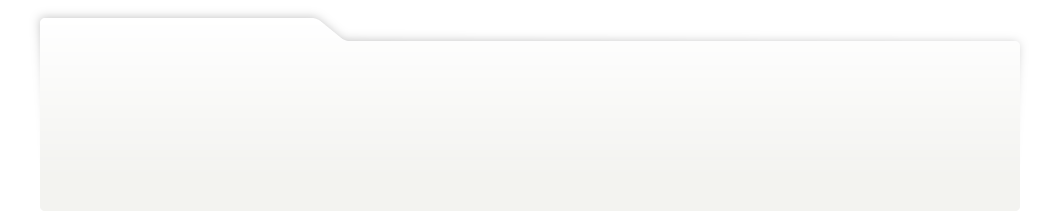
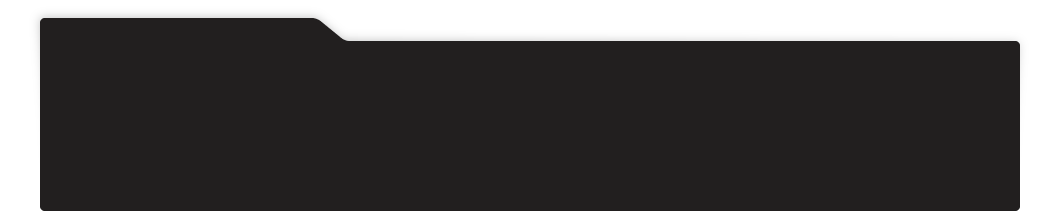
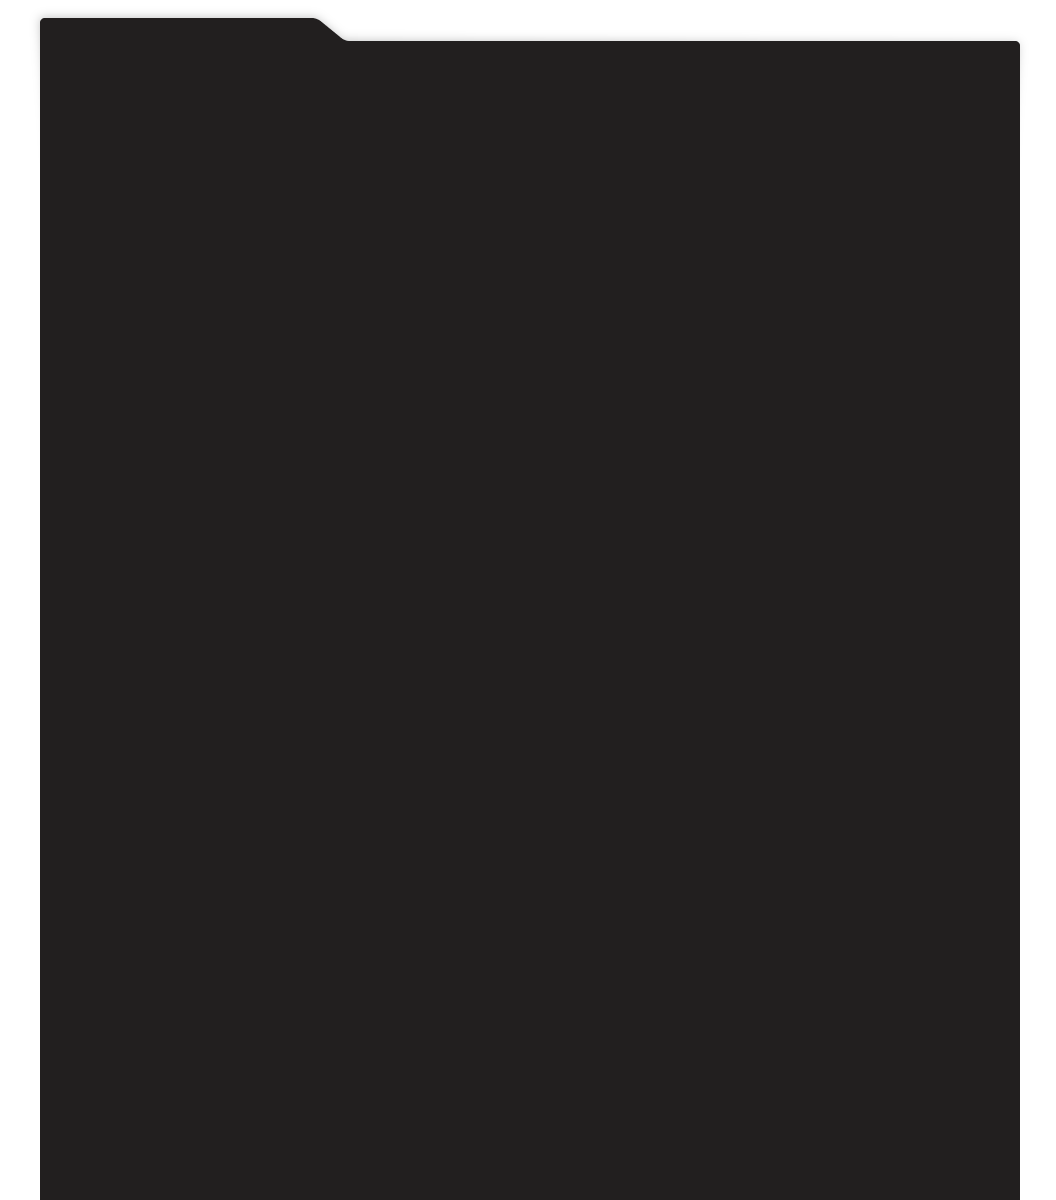
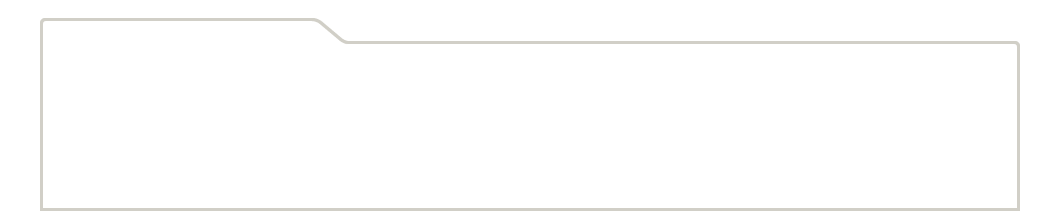
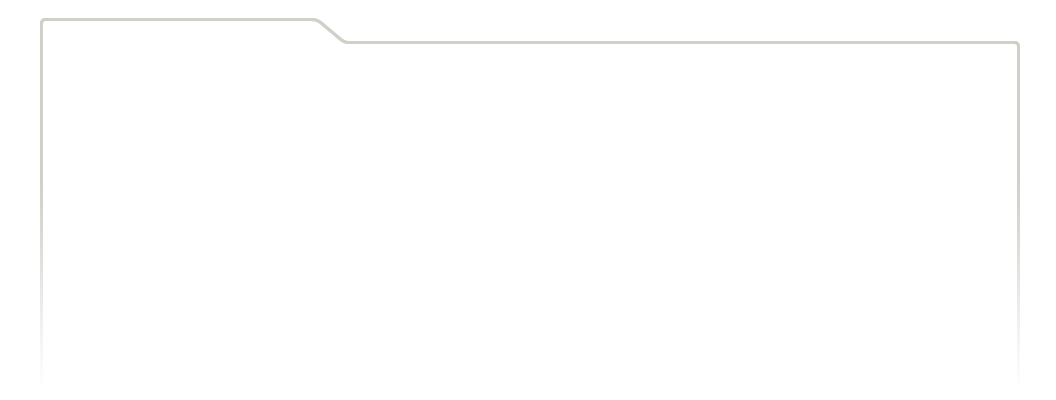
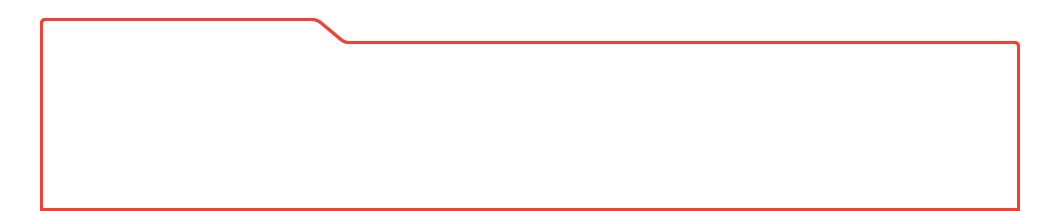
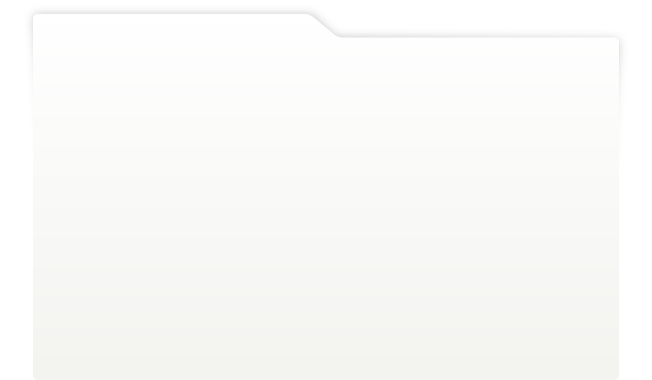
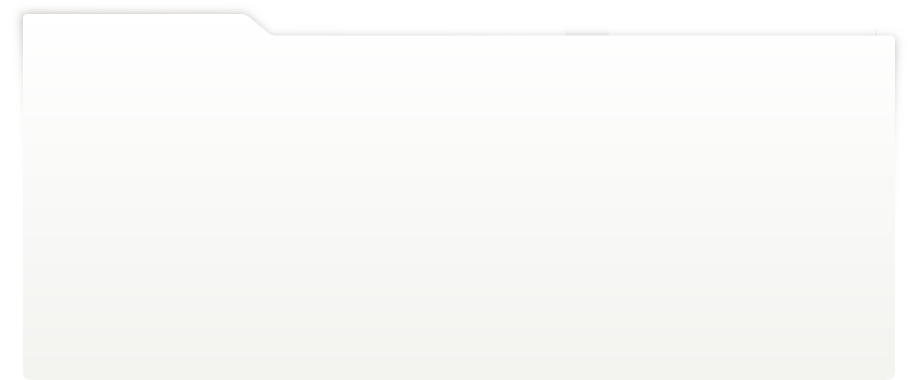
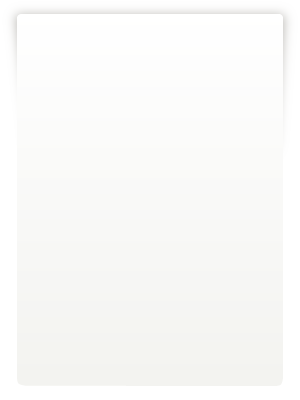
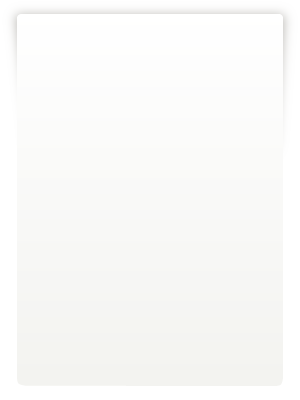
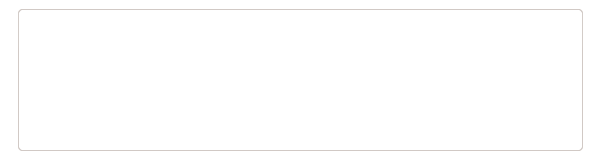
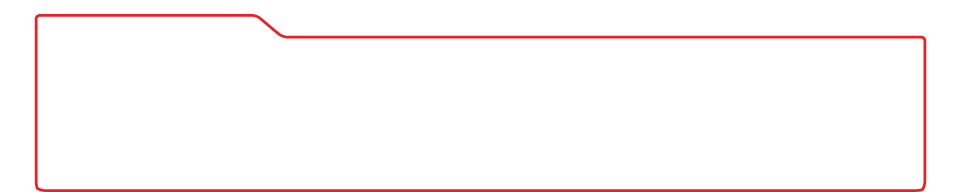
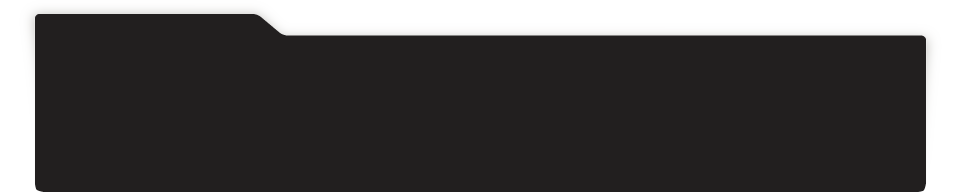
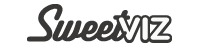
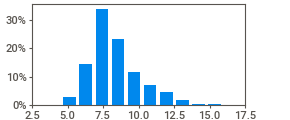
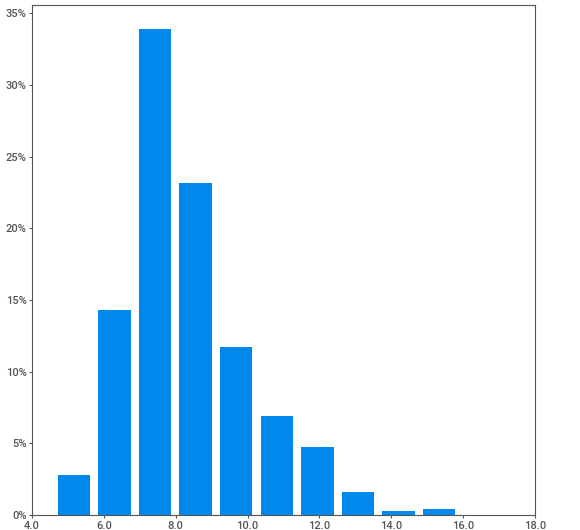
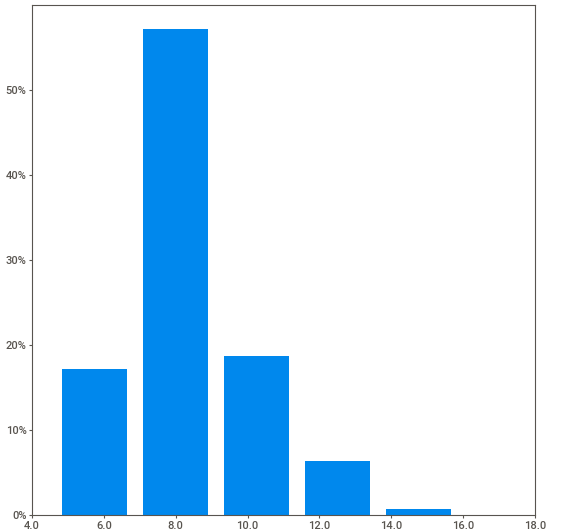
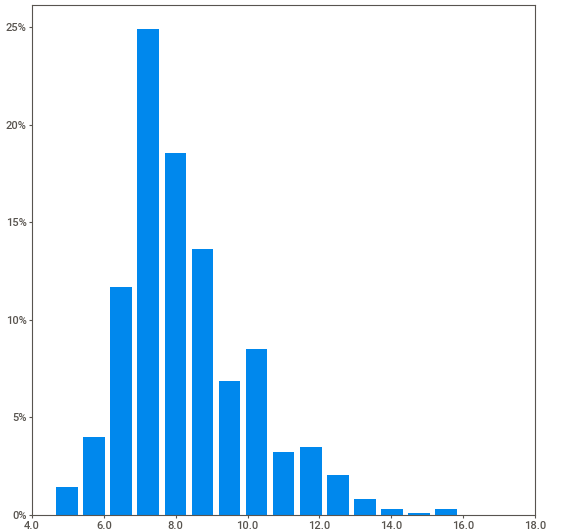
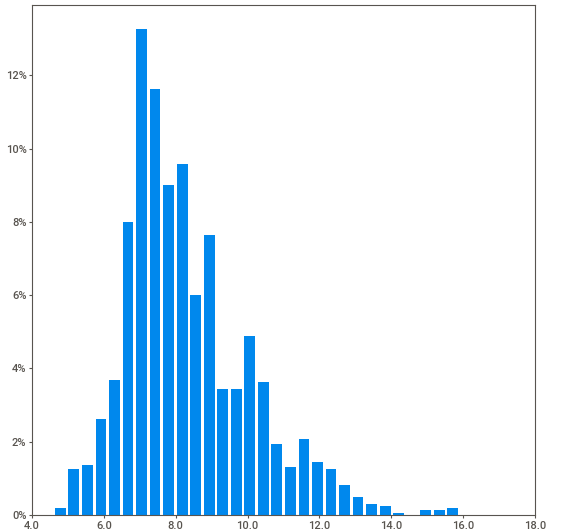
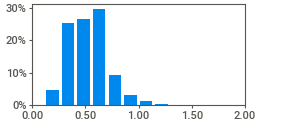
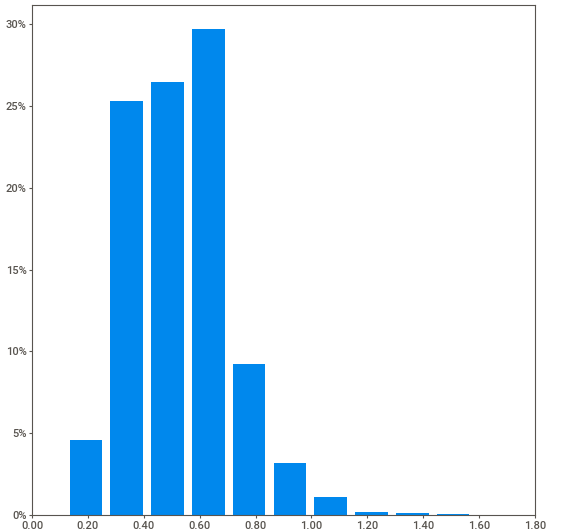
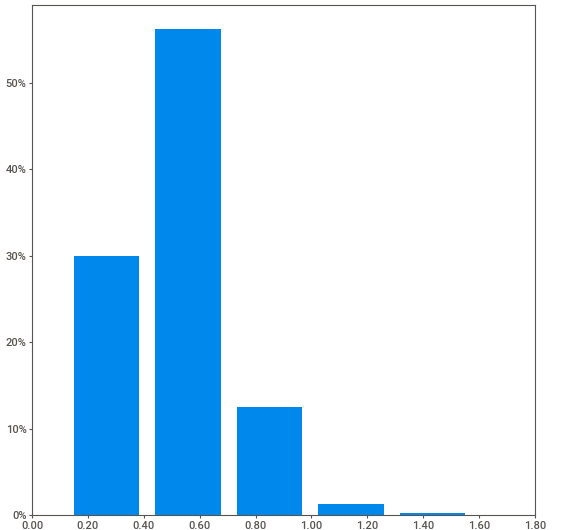
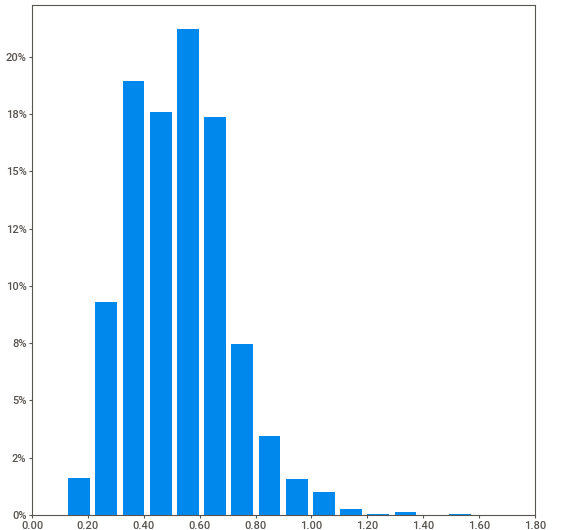
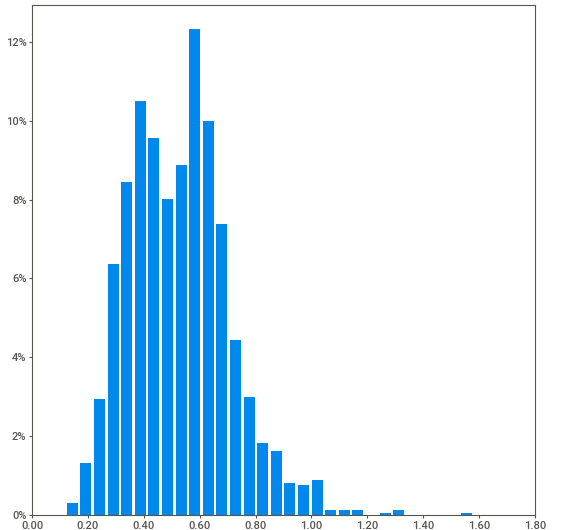
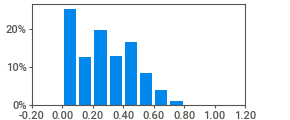
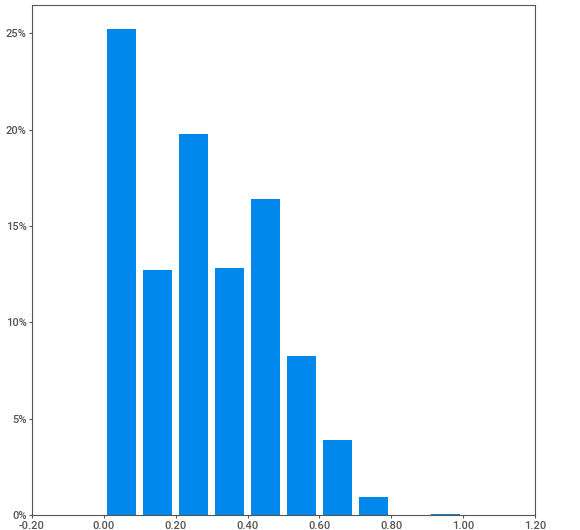
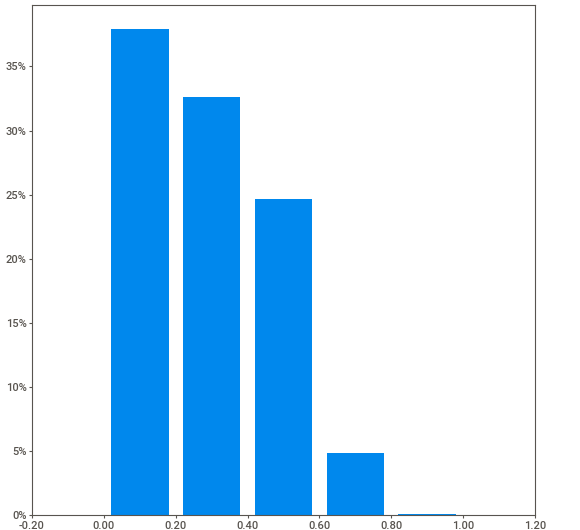
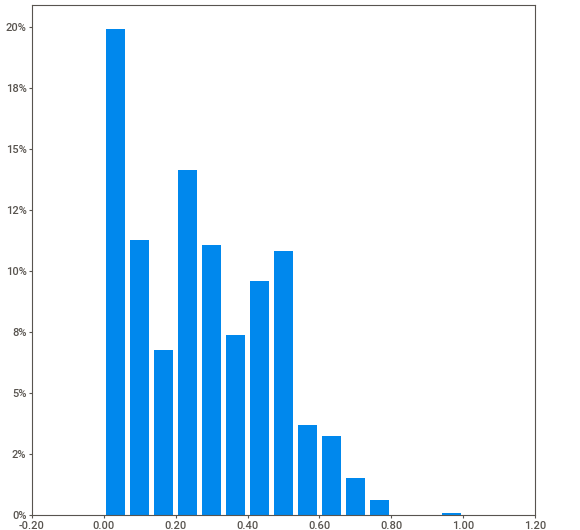
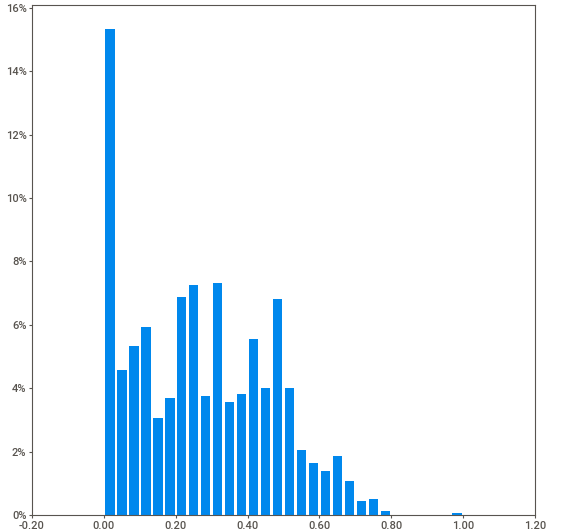
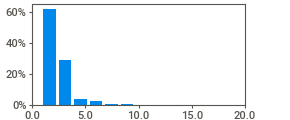
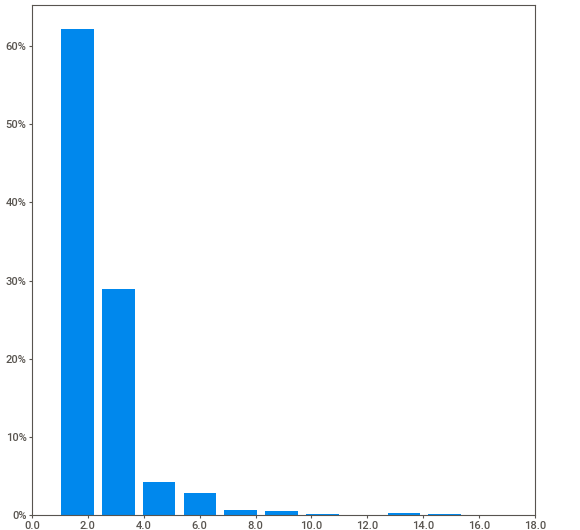
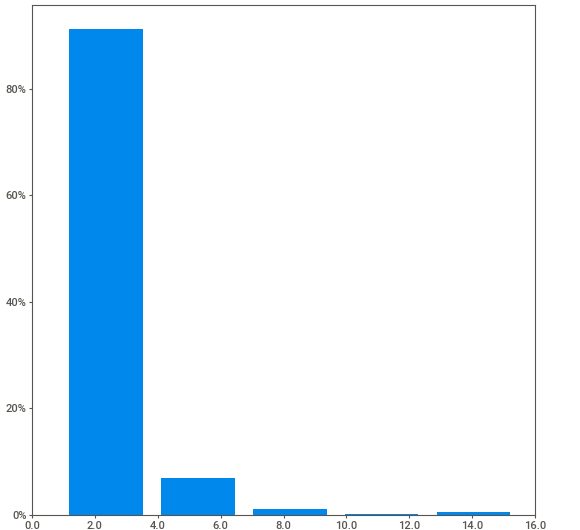
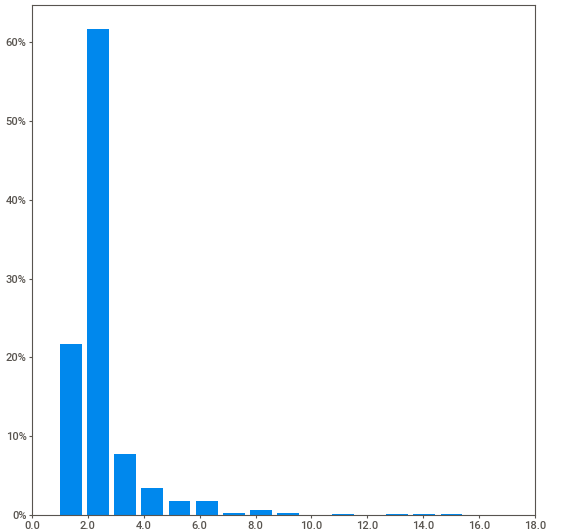
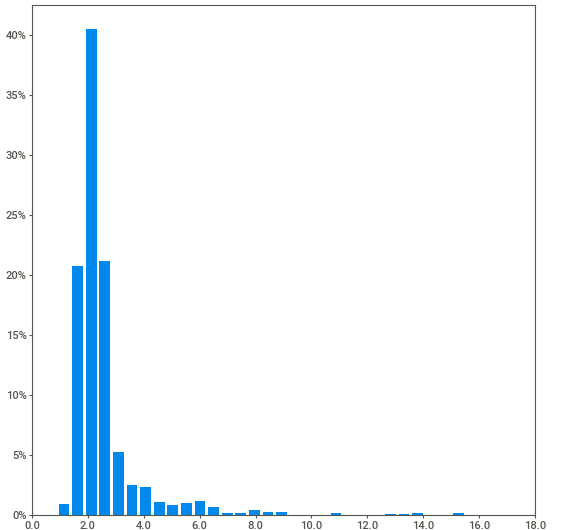
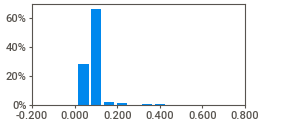
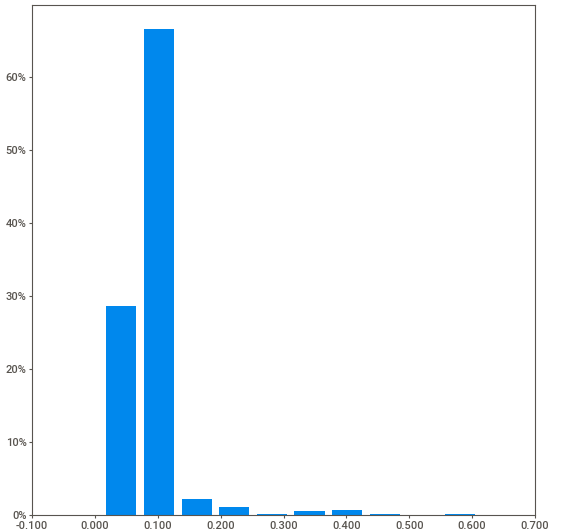
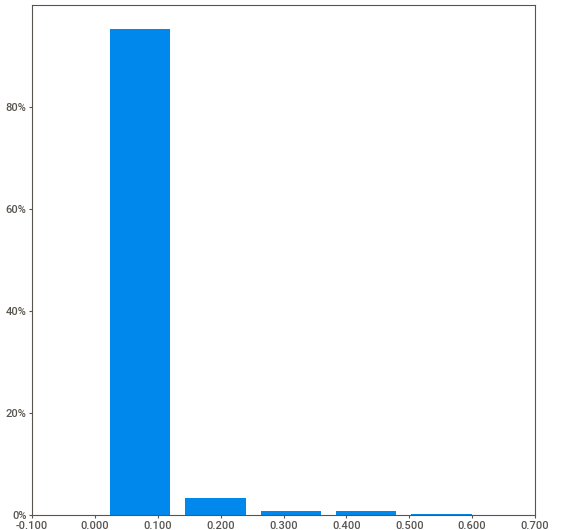
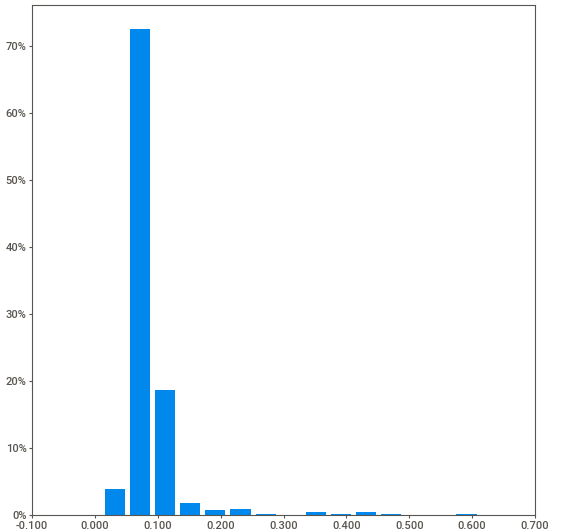
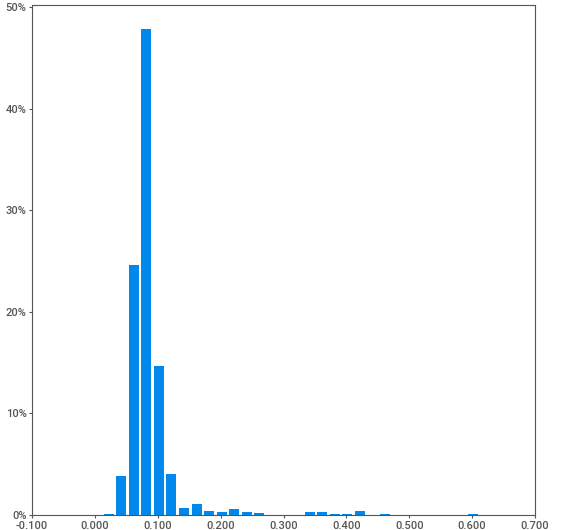
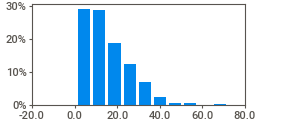
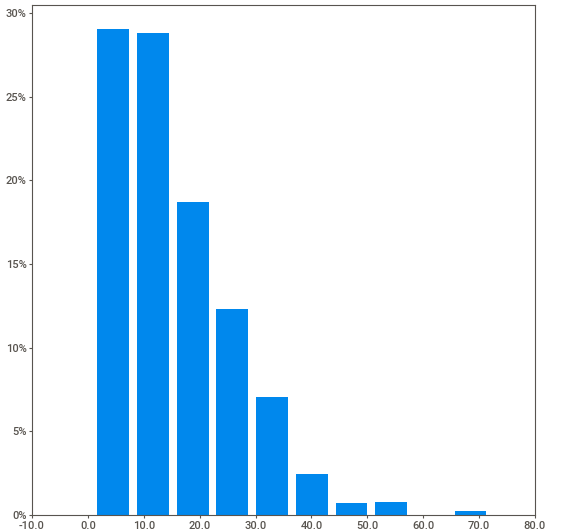
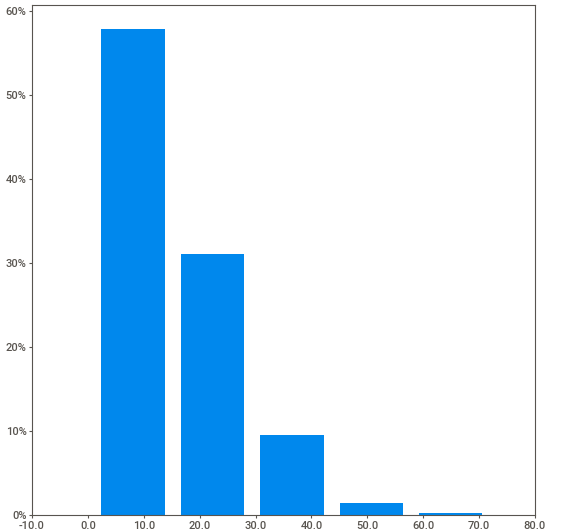
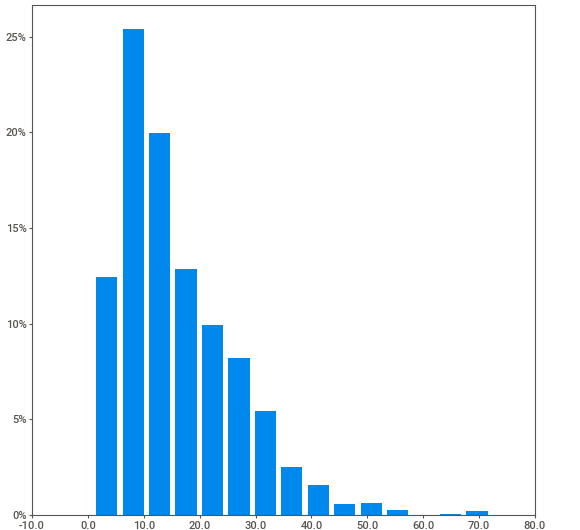
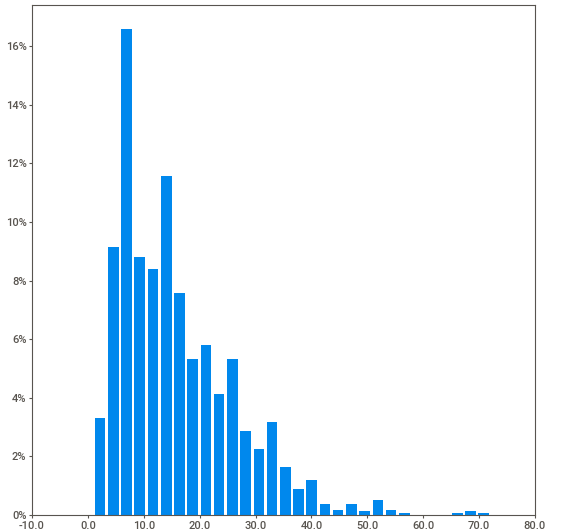
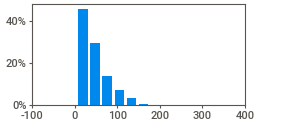
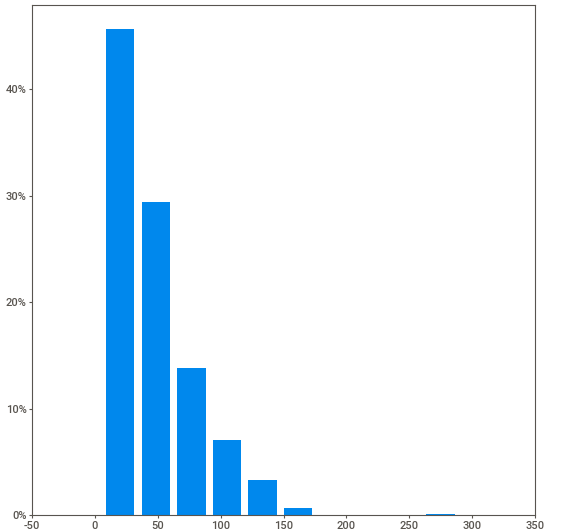
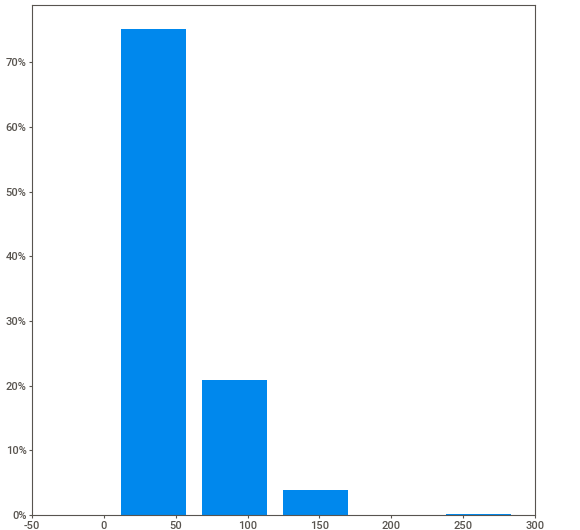
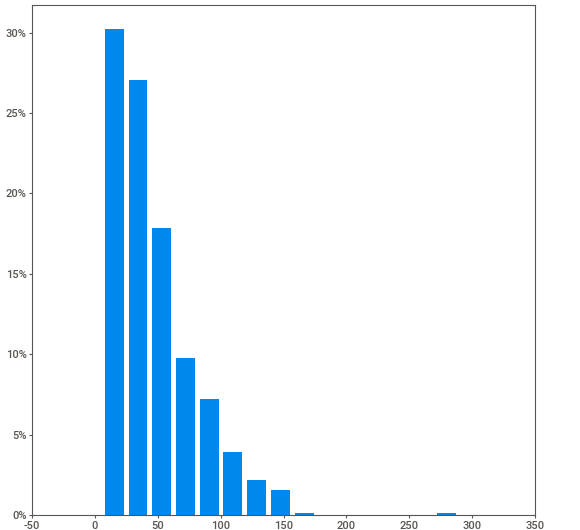
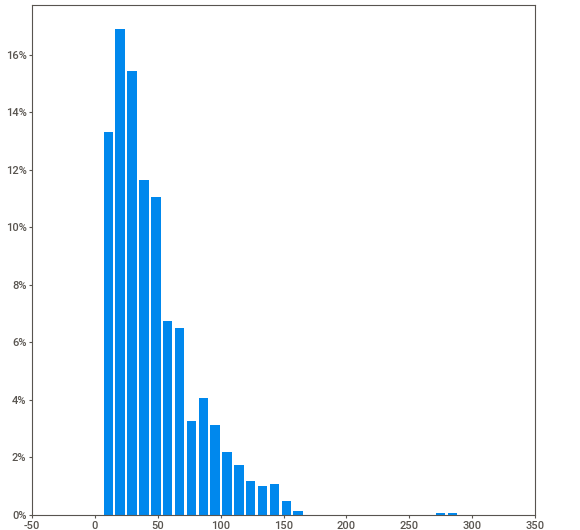
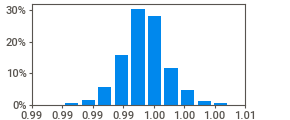
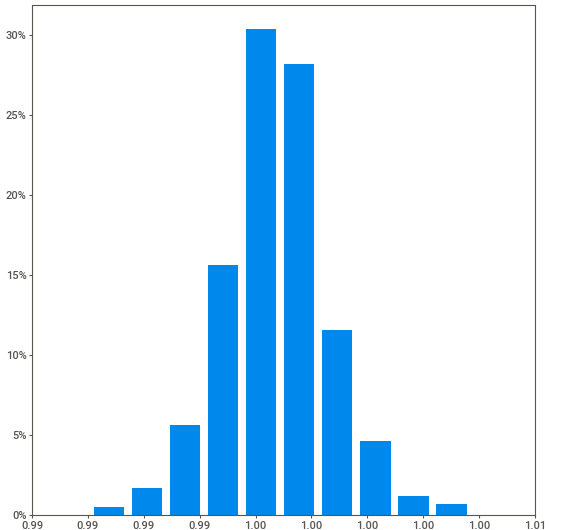
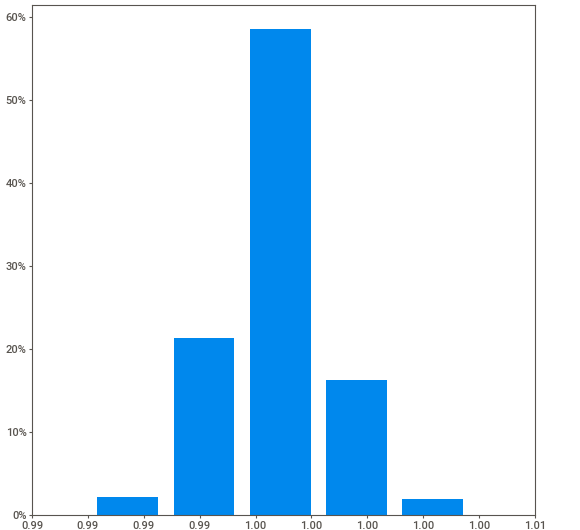
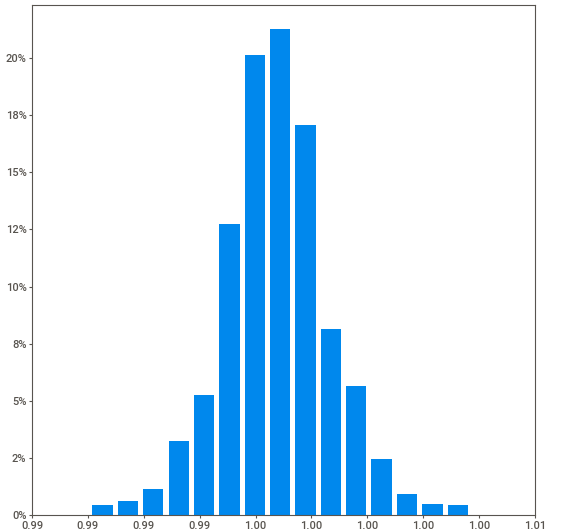
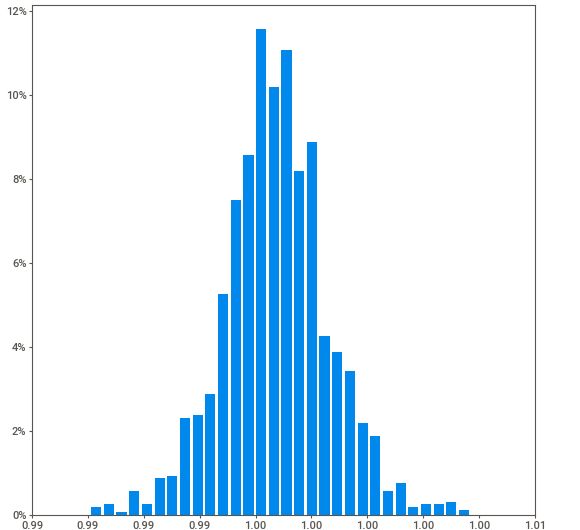
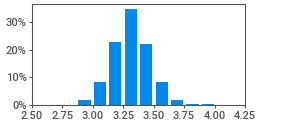
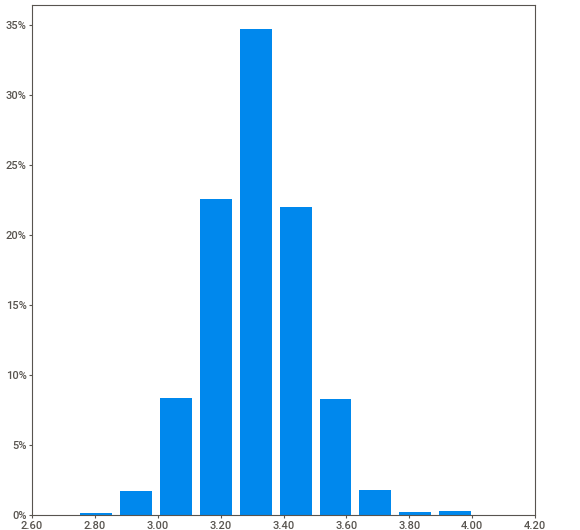
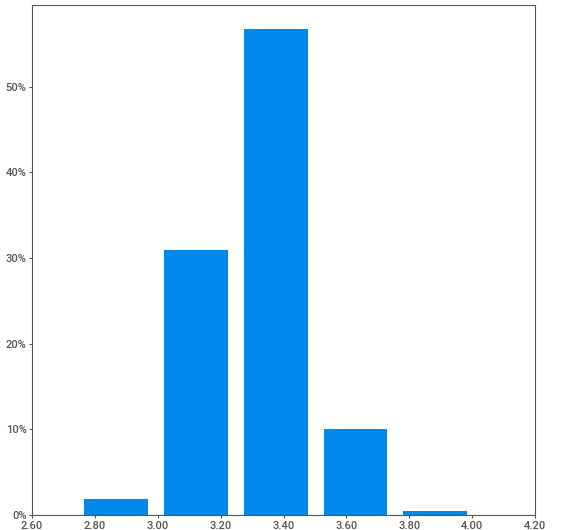
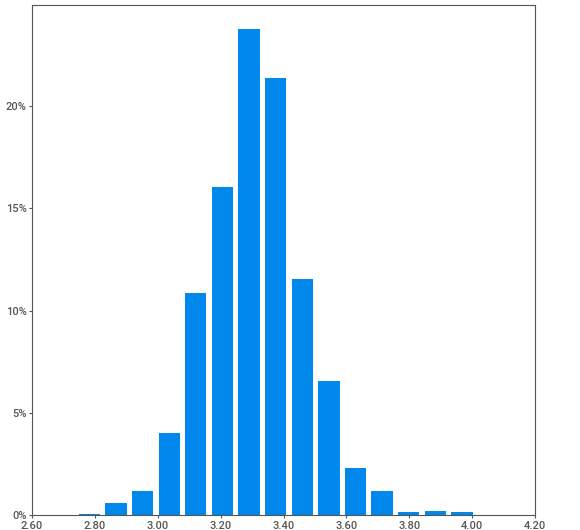
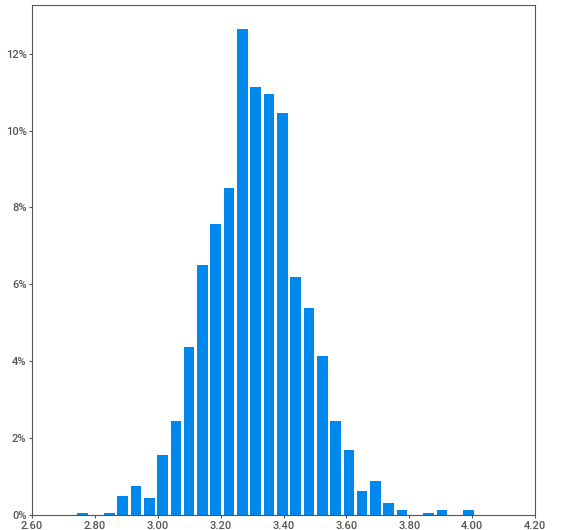
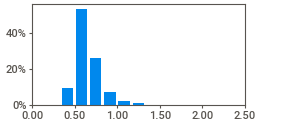
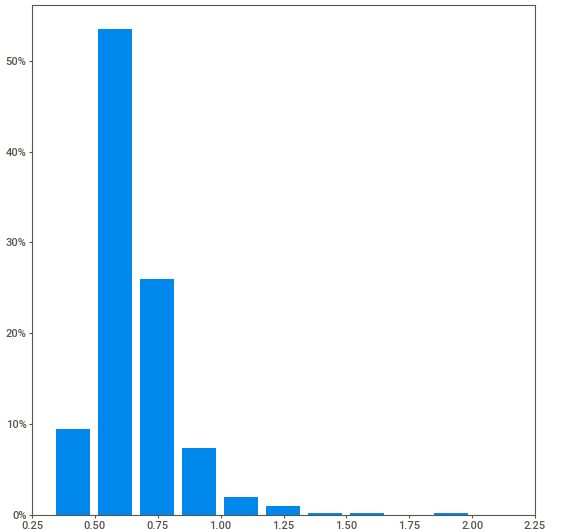
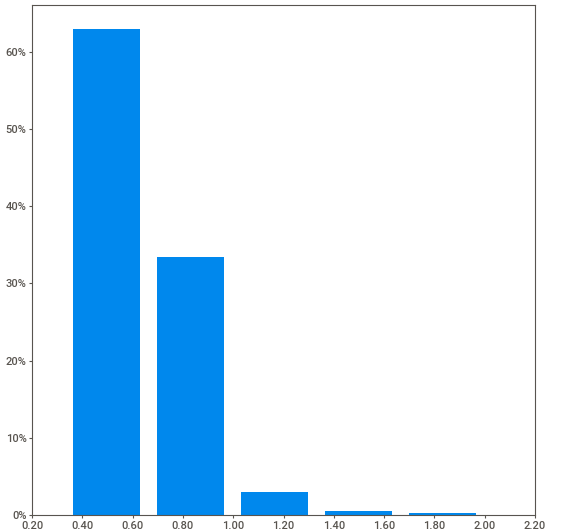
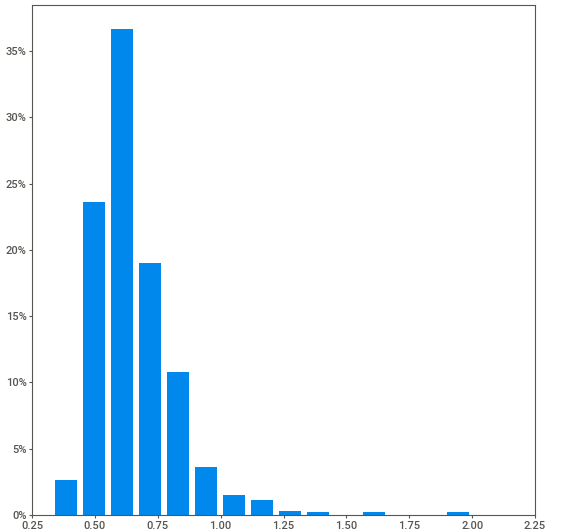
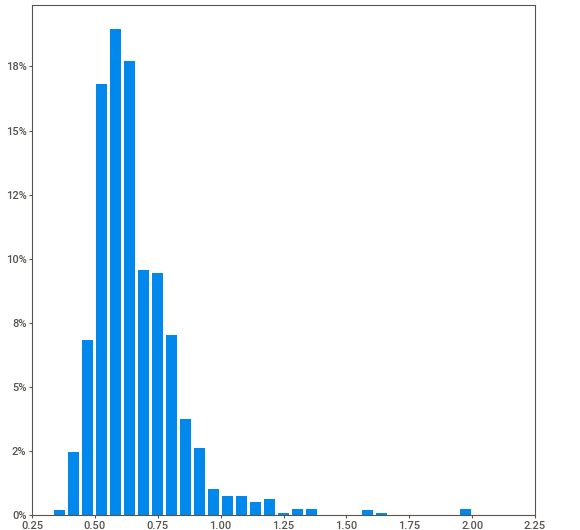
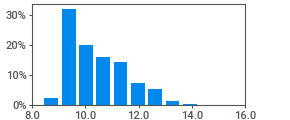
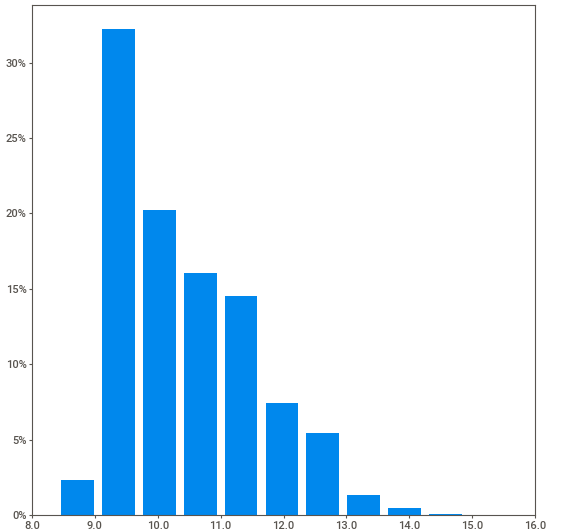
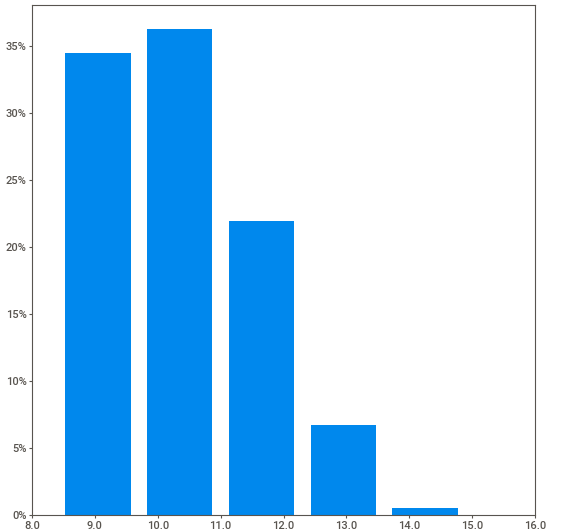
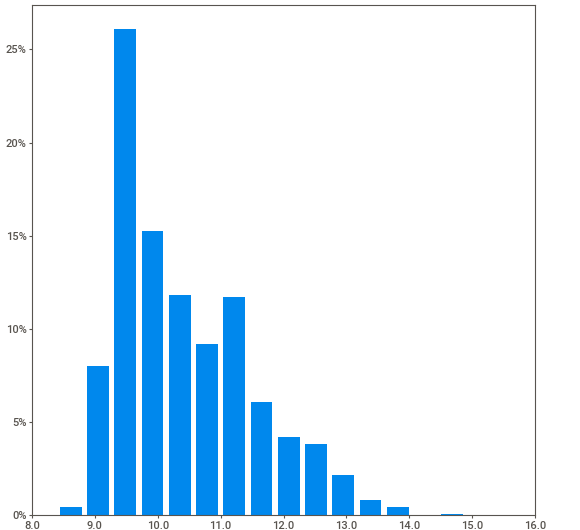
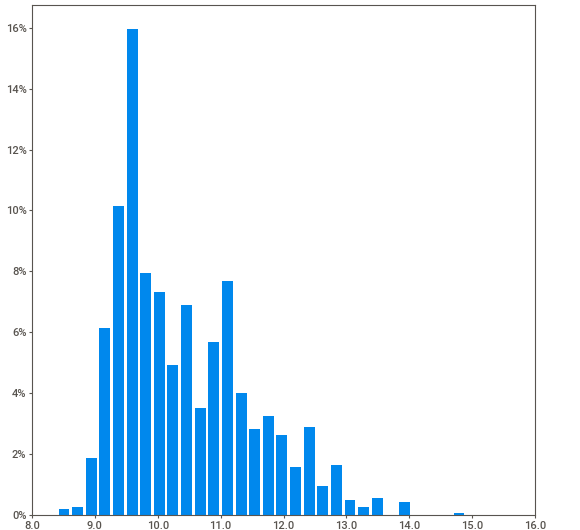
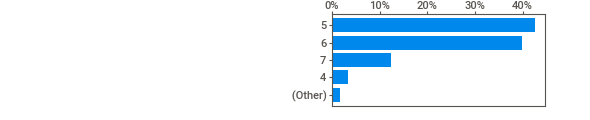
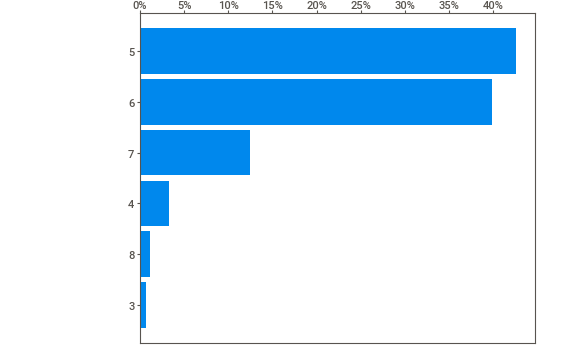
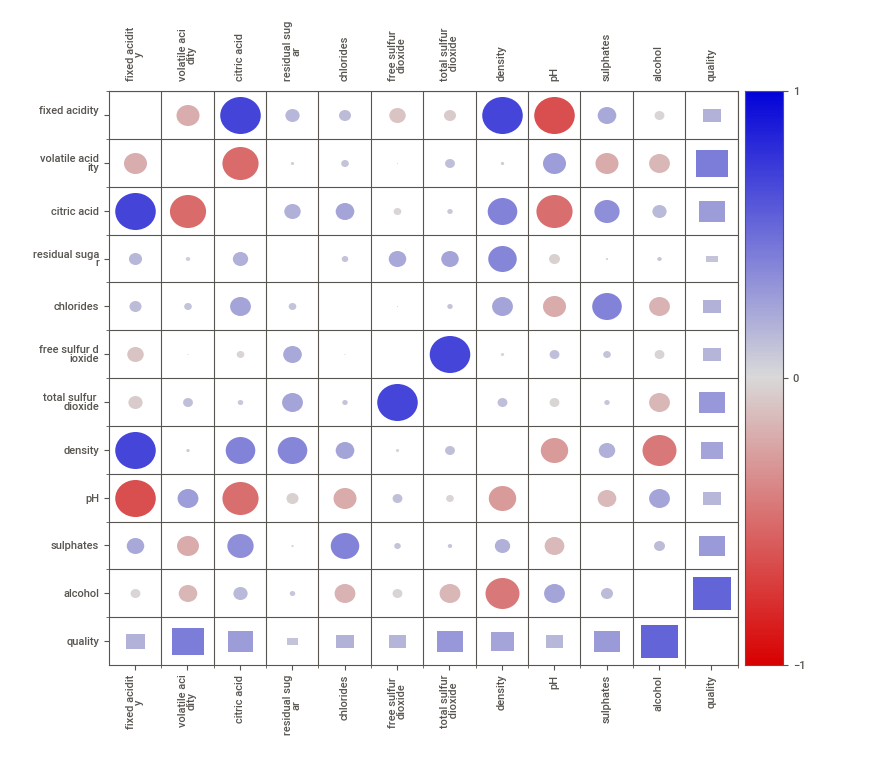
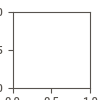

In [11]:
import sweetviz as sw

wine_report = sw.analyze(df)
wine_report.show_notebook(layout='vertical')

# PLOTTING GRAPHS FOR BETTER INSIGHT TO DATA DISTRIBUTION

Univariate plotting

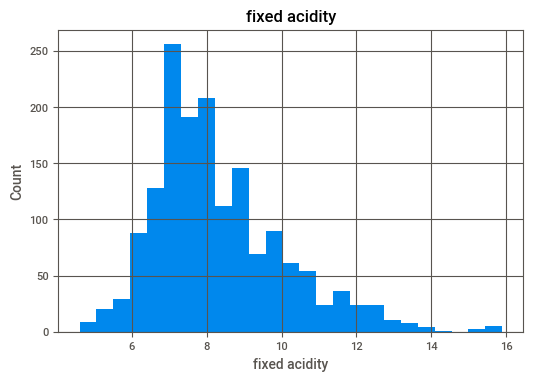

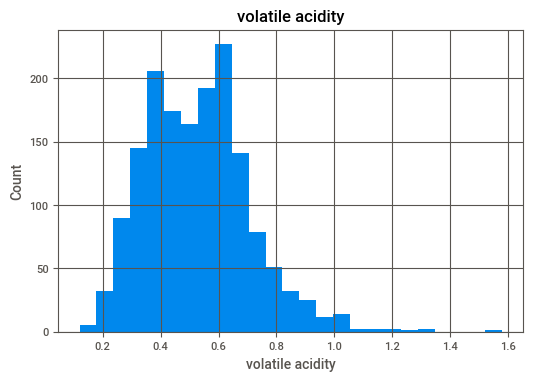

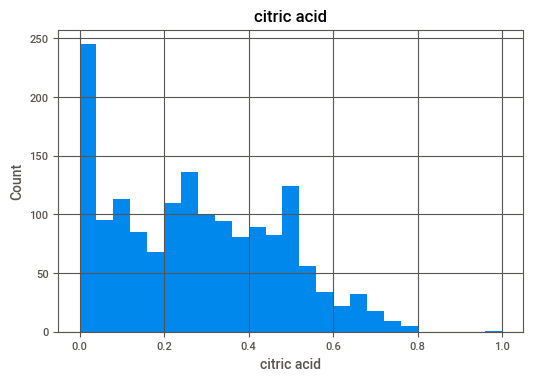

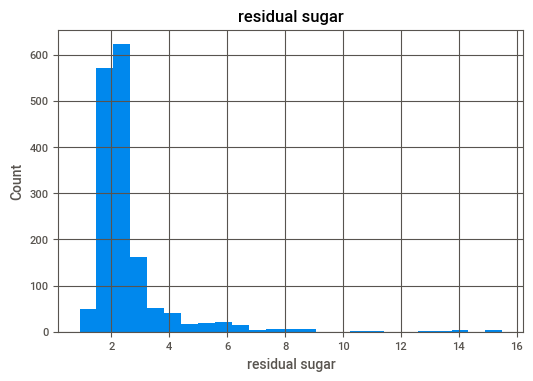

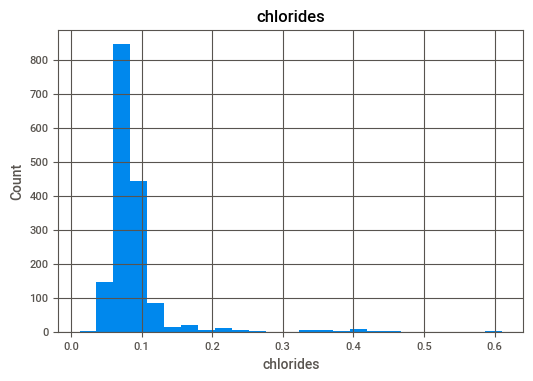

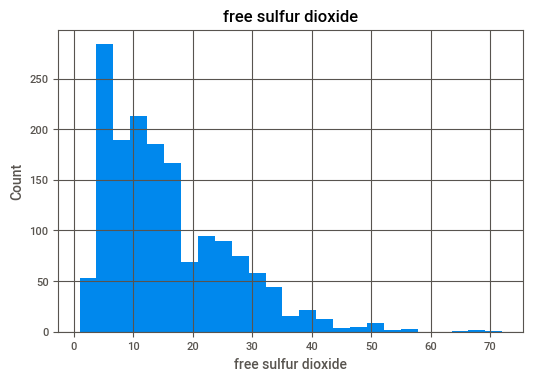

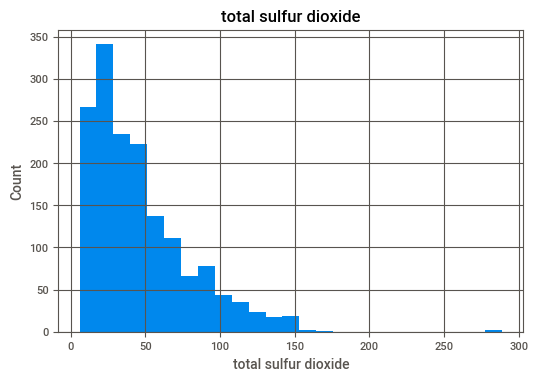

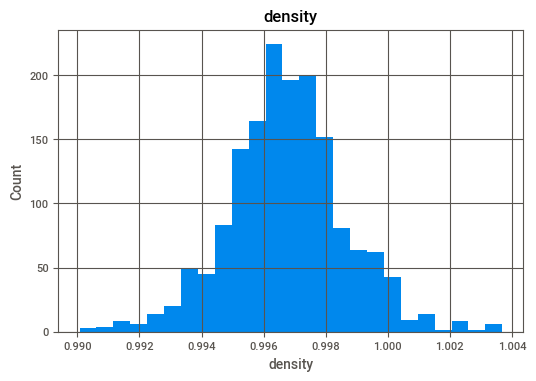

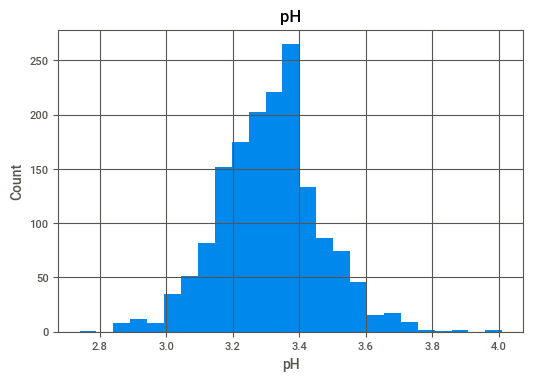

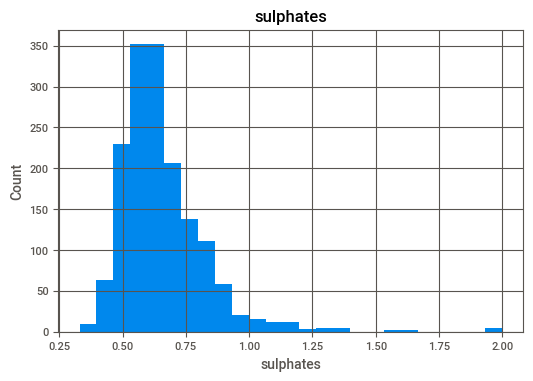

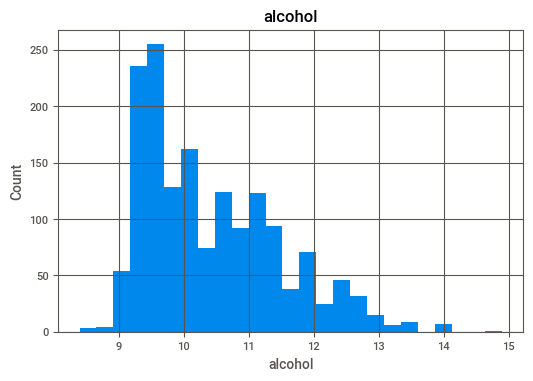

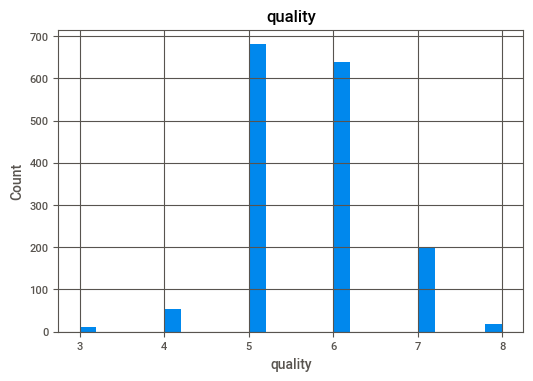

In [12]:
for feature in df.columns:
    df[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.xticks()
    plt.show()

Bivariate plotting

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

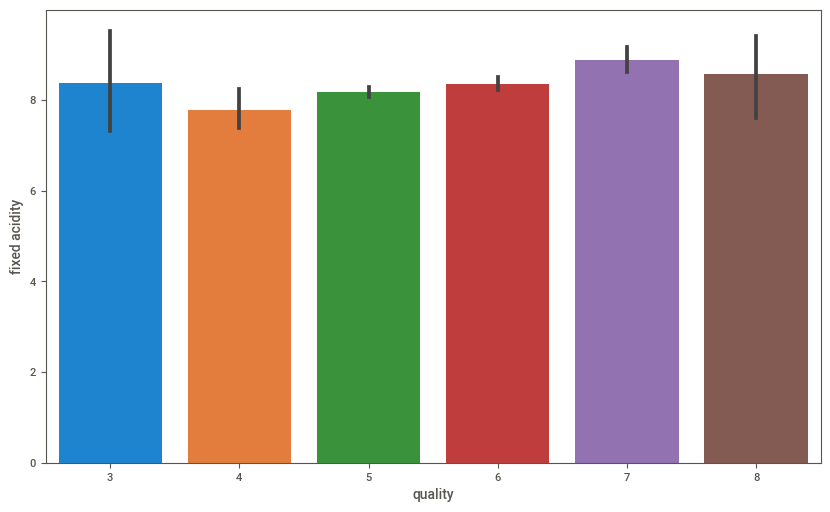

In [13]:
#fixed acidity v/s quality
plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='fixed acidity',data=df)

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

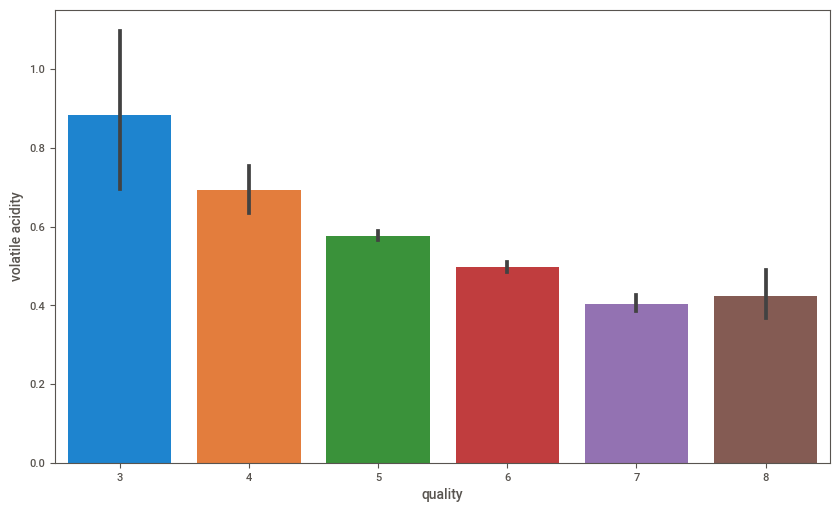

In [14]:
fig=plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='volatile acidity',data=df)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

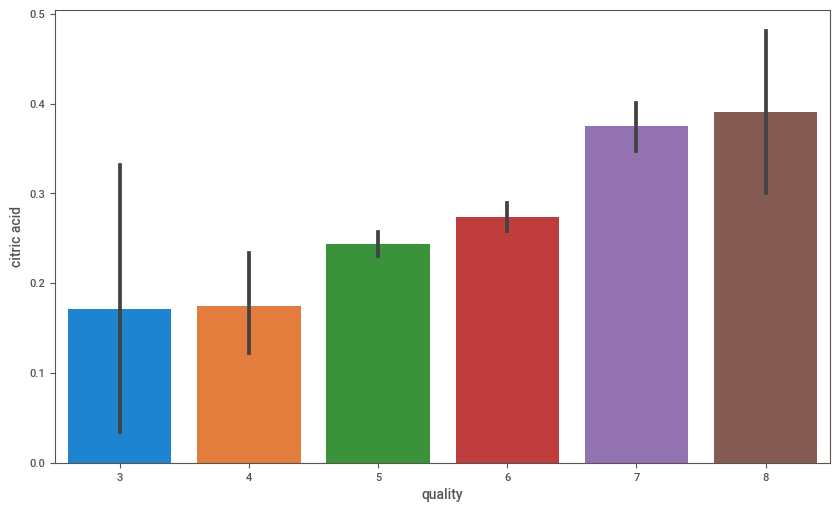

In [15]:
fig=plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='citric acid',data=df)

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

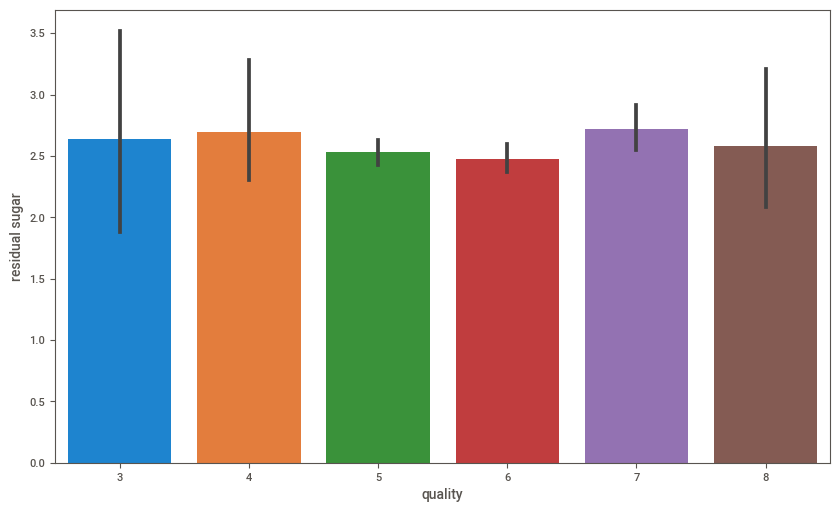

In [16]:
fig=plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='residual sugar',data=df)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

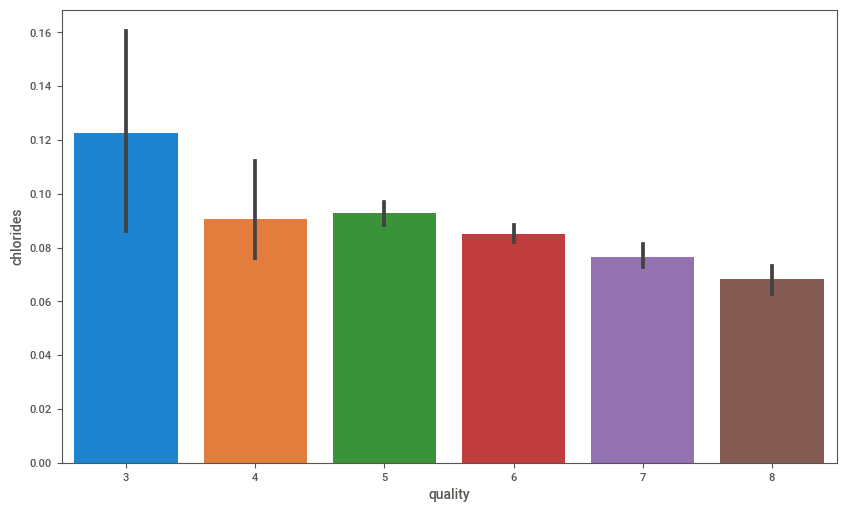

In [17]:
fig=plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='chlorides',data=df)

#### There is a "downward trend" in the above plot

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

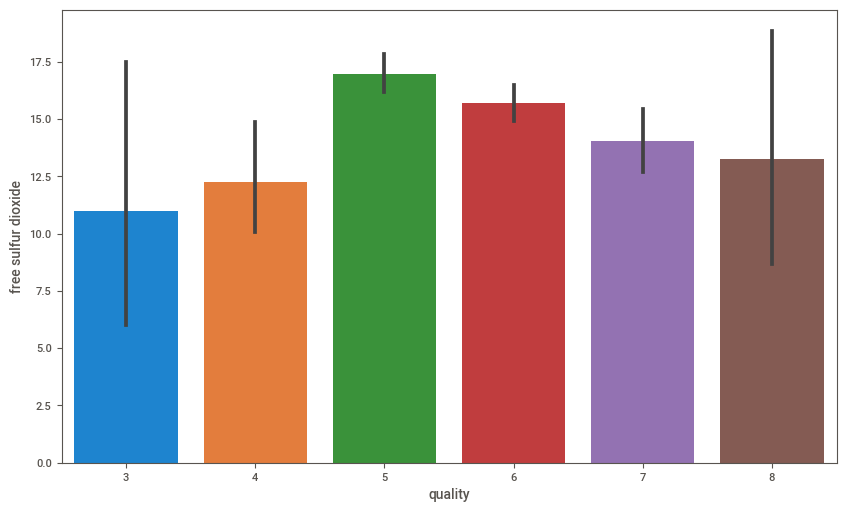

In [18]:
fig=plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='free sulfur dioxide',data=df)

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

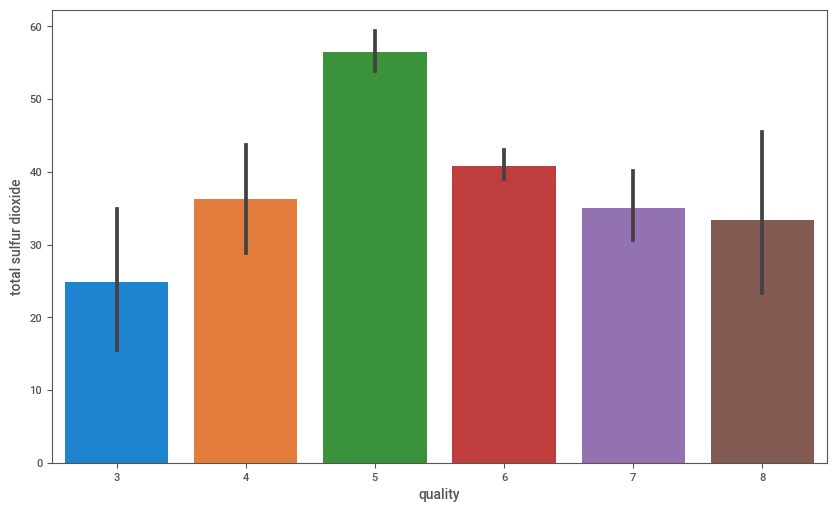

In [19]:
fig=plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='total sulfur dioxide',data=df)

<AxesSubplot:xlabel='quality', ylabel='density'>

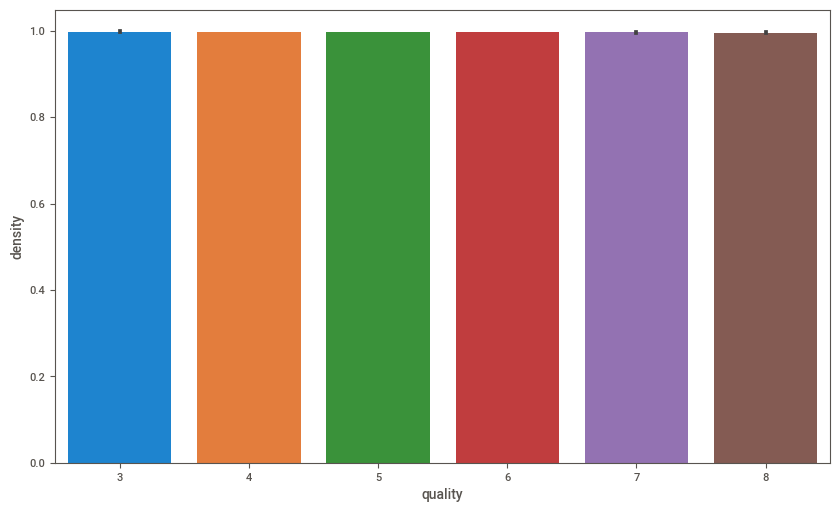

In [20]:
fig=plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='density',data=df)

<AxesSubplot:xlabel='quality', ylabel='pH'>

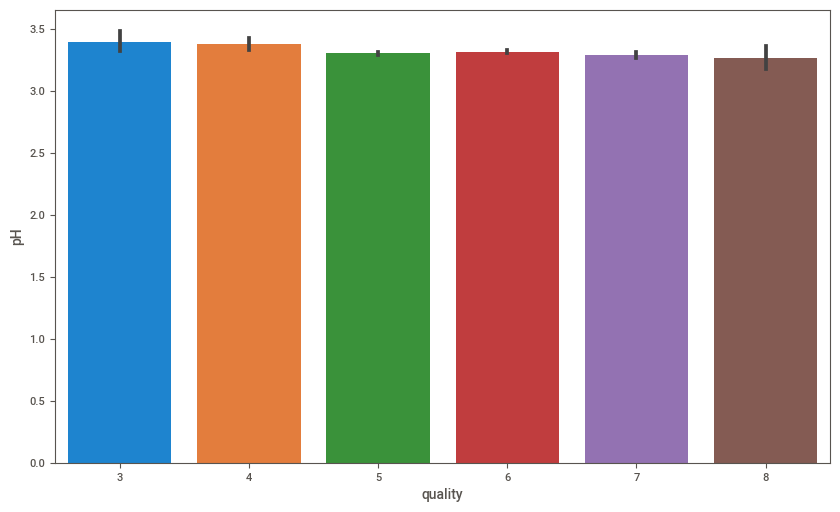

In [21]:
fig=plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='pH',data=df)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

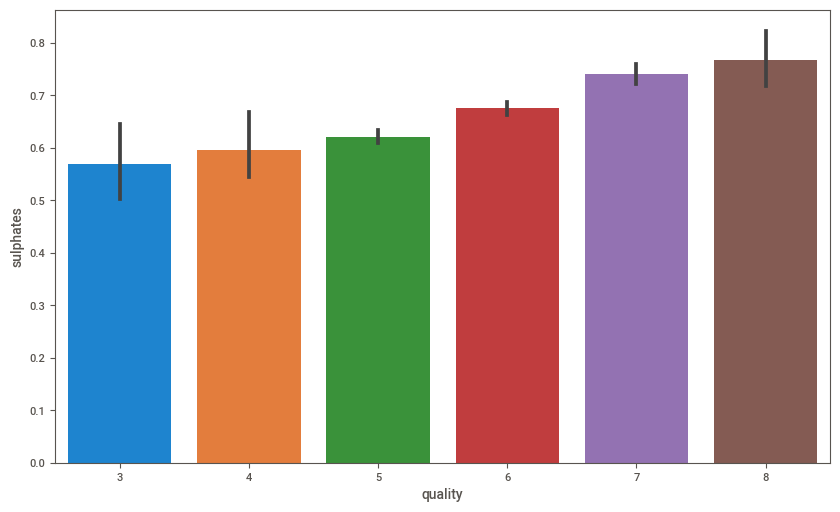

In [22]:
fig=plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='sulphates',data=df)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

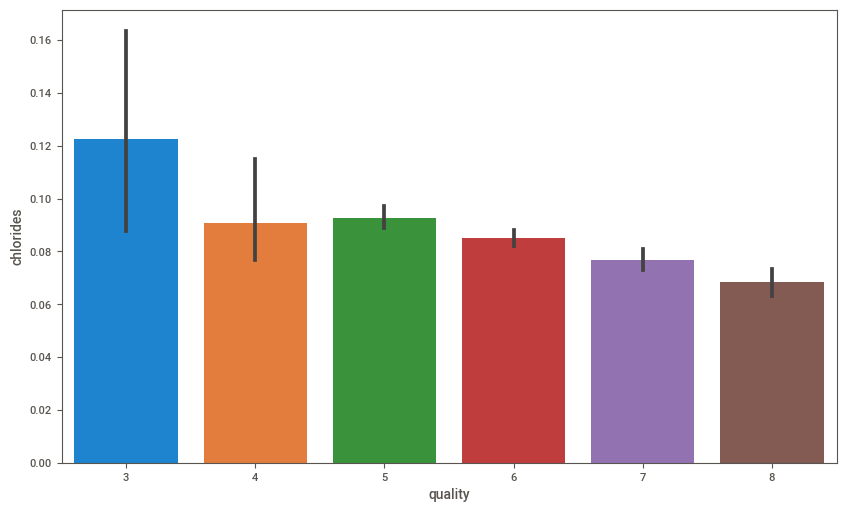

In [23]:
fig=plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='chlorides',data=df)

# Feature selection

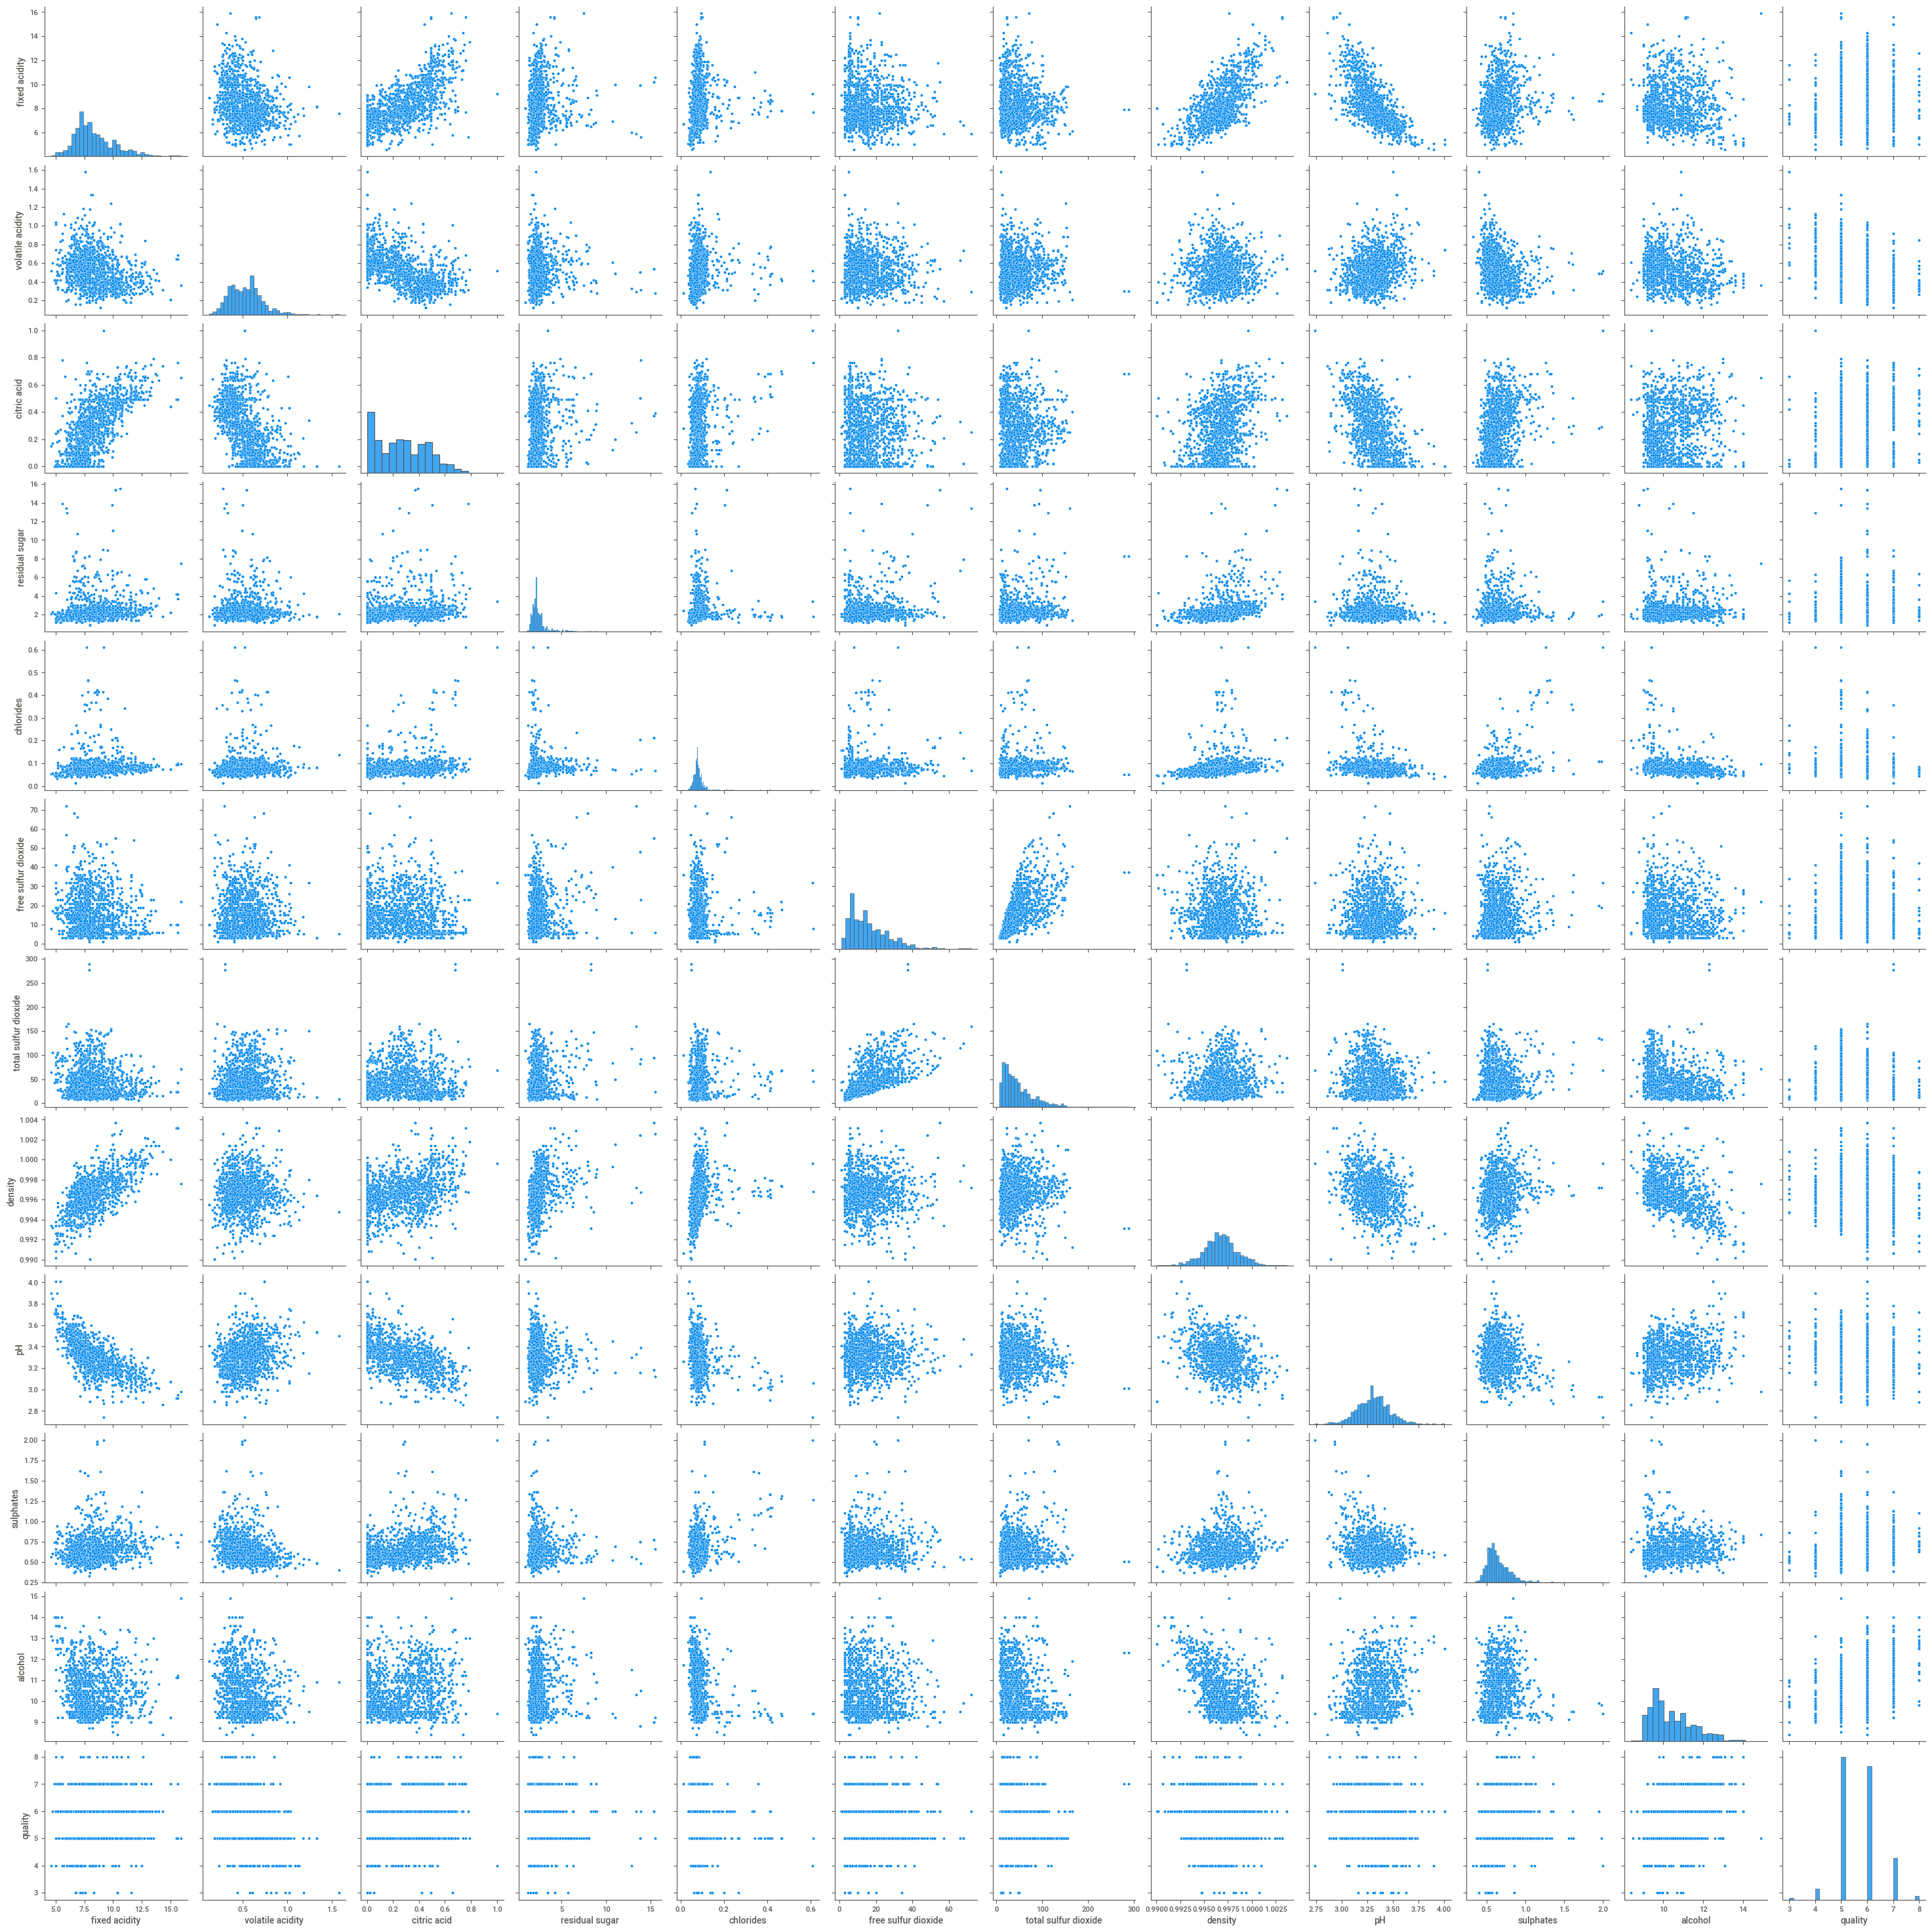

In [24]:
sns.pairplot(df)

<AxesSubplot:>

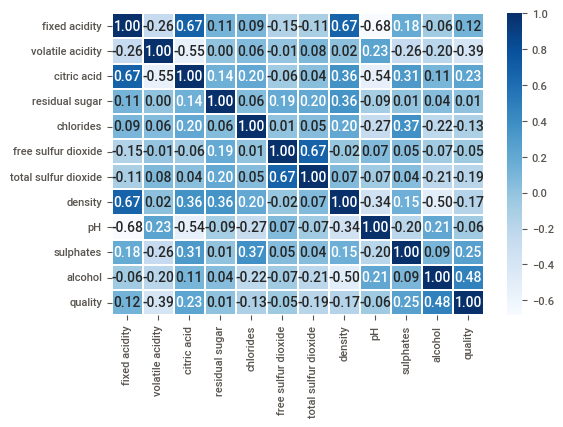

In [25]:
sns.heatmap(df.corr(),cmap="Blues",annot=True,fmt=".2f",linewidth=.1)

-citric acid and sulphates:high collinearity 

In [26]:
#detecting outliers

from scipy.stats import zscore

dfzscore=np.abs(zscore(df))

print(np.where(dfzscore>3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        459,  467,  480,  480,  494,  515,  517,  544,  554,  554,  555,
        555,  557,  557,  568,  584,  588,  591,  595,  608,  614,  636,
        639,  649,  649,  651,  652,  652,  652,  672,  672,  684,  690,
        690,  692,  692,  695,  723,  724,  730,  754,  776,  777,  795,
        821,  832,  836,  837,  889,  899,  911,  917,  923,  925,  926,
        982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
       1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244,
       1244, 1244, 1260, 1269, 1269, 1270, 1270, 1

In [27]:
dfnew=df[(dfzscore<3).all(axis=1)]
print('dfnew.shape=',dfnew.shape)

df=dfnew

dfnew.shape= (1451, 12)


In [28]:
df.drop(['citric acid'],axis=1,inplace=True)
df

fixed acidity  volatile acidity  residual sugar  chlorides  \
0               7.4             0.700            1.90      0.076   
1               7.8             0.880            2.60      0.098   
2               7.8             0.760            2.30      0.092   
3              11.2             0.280            1.90      0.075   
4               7.4             0.700            1.90      0.076   
5               7.4             0.660            1.80      0.075   
6               7.9             0.600            1.60      0.069   
7               7.3             0.650            1.20      0.065   
8               7.8             0.580            2.00      0.073   
9               7.5             0.500            6.10      0.071   
10              6.7             0.580            1.80      0.097   
11              7.5             0.500            6.10      0.071   
12              5.6             0.615            1.60      0.089   
16              8.5             0.280            1.80      0.092   
18              7.4             0.590            4.40      0.086   
20              8.9             0.220            1.80      0.077   
21              7.6             0.390            2.30      0.082   
22              7.9             0.430            1.60      0.106   
23              8.5             0.490            2.30      0.084   
24              6.9             0.400            2.40      0.085   
25              6.3             0.390            1.40      0.080   
26              7.6             0.410            1.80      0.080   
27              7.9             0.430            1.60      0.106   
28              7.1             0.710            1.90      0.080   
29              7.8             0.645            2.00      0.082   
30              6.7             0.675            2.40      0.089   
31              6.9             0.685            2.50      0.105   
32              8.3             0.655            2.30      0.083   
34              5.2             0.320            1.80      0.103   
35              7.8             0.645            5.50      0.086   
36              7.8             0.600            2.40      0.086   
37              8.1             0.380            2.10      0.066   
39              7.3             0.450            5.90      0.074   
40              7.3             0.450            5.90      0.074   
41              8.8             0.610            2.80      0.088   
44              6.8             0.670            1.80      0.050   
46              7.7             0.935            2.20      0.114   
47              8.7             0.290            1.60      0.113   
48              6.4             0.400            1.60      0.066   
49              5.6             0.310            1.40      0.074   
50              8.8             0.660            1.70      0.074   
51              6.6             0.520            2.20      0.069   
52              6.6             0.500            2.10      0.068   
53              8.6             0.380            3.00      0.081   
54              7.6             0.510            2.80      0.110   
55              7.7             0.620            3.80      0.084   
56             10.2             0.420            3.40      0.070   
58              7.8             0.590            2.30      0.076   
59              7.3             0.390            2.40      0.074   
60              8.8             0.400            2.20      0.079   
61              7.7             0.690            1.80      0.115   
62              7.5             0.520            1.90      0.085   
63              7.0             0.735            2.00      0.081   
64              7.2             0.725            4.65      0.086   
65              7.2             0.725            4.65      0.086   
66              7.5             0.520            1.50      0.079   
67              6.6             0.705            1.60      0.076   
68              9.3             0.320            2.00      0.0

# PRE PROCESSING DATA FOR ML ALGO

In [29]:
# classifying the wine quality as good or bad based on its quality
# "Bad" or 0 if quality of wine lies in the range (3,6)
# "Good" or 1 if quality of wine lies in the range (7,8)

df['quality']=df['quality'].apply(lambda x:1 if x>6.5 else 0)
df

fixed acidity  volatile acidity  residual sugar  chlorides  \
0               7.4             0.700            1.90      0.076   
1               7.8             0.880            2.60      0.098   
2               7.8             0.760            2.30      0.092   
3              11.2             0.280            1.90      0.075   
4               7.4             0.700            1.90      0.076   
5               7.4             0.660            1.80      0.075   
6               7.9             0.600            1.60      0.069   
7               7.3             0.650            1.20      0.065   
8               7.8             0.580            2.00      0.073   
9               7.5             0.500            6.10      0.071   
10              6.7             0.580            1.80      0.097   
11              7.5             0.500            6.10      0.071   
12              5.6             0.615            1.60      0.089   
16              8.5             0.280            1.80      0.092   
18              7.4             0.590            4.40      0.086   
20              8.9             0.220            1.80      0.077   
21              7.6             0.390            2.30      0.082   
22              7.9             0.430            1.60      0.106   
23              8.5             0.490            2.30      0.084   
24              6.9             0.400            2.40      0.085   
25              6.3             0.390            1.40      0.080   
26              7.6             0.410            1.80      0.080   
27              7.9             0.430            1.60      0.106   
28              7.1             0.710            1.90      0.080   
29              7.8             0.645            2.00      0.082   
30              6.7             0.675            2.40      0.089   
31              6.9             0.685            2.50      0.105   
32              8.3             0.655            2.30      0.083   
34              5.2             0.320            1.80      0.103   
35              7.8             0.645            5.50      0.086   
36              7.8             0.600            2.40      0.086   
37              8.1             0.380            2.10      0.066   
39              7.3             0.450            5.90      0.074   
40              7.3             0.450            5.90      0.074   
41              8.8             0.610            2.80      0.088   
44              6.8             0.670            1.80      0.050   
46              7.7             0.935            2.20      0.114   
47              8.7             0.290            1.60      0.113   
48              6.4             0.400            1.60      0.066   
49              5.6             0.310            1.40      0.074   
50              8.8             0.660            1.70      0.074   
51              6.6             0.520            2.20      0.069   
52              6.6             0.500            2.10      0.068   
53              8.6             0.380            3.00      0.081   
54              7.6             0.510            2.80      0.110   
55              7.7             0.620            3.80      0.084   
56             10.2             0.420            3.40      0.070   
58              7.8             0.590            2.30      0.076   
59              7.3             0.390            2.40      0.074   
60              8.8             0.400            2.20      0.079   
61              7.7             0.690            1.80      0.115   
62              7.5             0.520            1.90      0.085   
63              7.0             0.735            2.00      0.081   
64              7.2             0.725            4.65      0.086   
65              7.2             0.725            4.65      0.086   
66              7.5             0.520            1.50      0.079   
67              6.6             0.705            1.60      0.076   
68              9.3             0.320            2.00      0.0

0    1250
1     201
Name: quality, dtype: int64


<AxesSubplot:xlabel='quality', ylabel='count'>

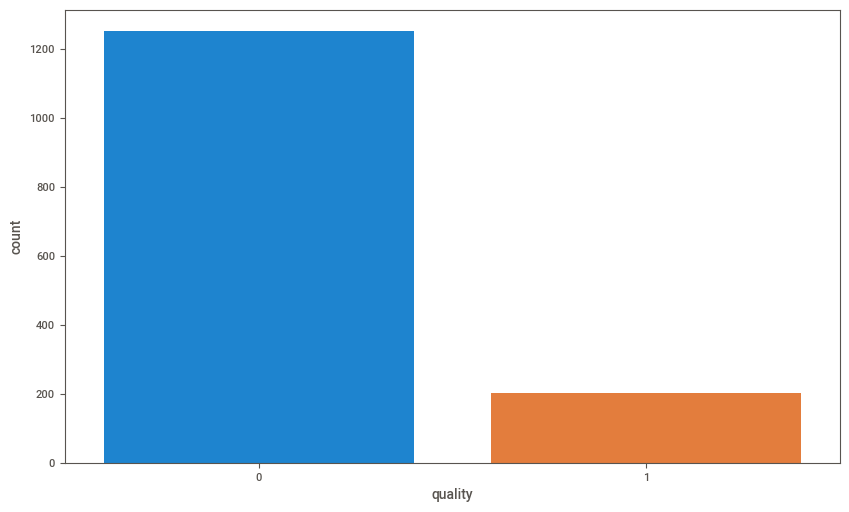

In [30]:
print(df['quality'].value_counts())

fig=plt.figure(figsize=(10,6))
sns.countplot(df['quality'])

In [31]:
#separating dependent and independent variables

x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [32]:
#splitting train and test sets

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

print("x_train shape:",x_train.shape)
print("x_test shape:",x_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

x_train shape: (1160, 10)
x_test shape: (291, 10)
y_train shape: (1160,)
y_test shape: (291,)


In [33]:
 # applying standard scaling to the dataset to scale all the fields values to same scale 
    
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

# CREATING ML ALGO

In [34]:
lg=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()



model=[lg,gnb,svc,dtc,knn]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m,'is:')
    print((accuracy_score(y_test,predm)))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Accuracy score of LogisticRegression() is:
0.8625429553264605
[[238   9]
 [ 31  13]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       247
           1       0.59      0.30      0.39        44

    accuracy                           0.86       291
   macro avg       0.74      0.63      0.66       291
weighted avg       0.84      0.86      0.84       291



Accuracy score of GaussianNB() is:
0.872852233676976
[[226  21]
 [ 16  28]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       247
           1       0.57      0.64      0.60        44

    accuracy                           0.87       291
   macro avg       0.75      0.78      0.76       291
weighted avg       0.88      0.87      0.88       291



Accuracy score of SVC() is:
0.8969072164948454
[[243   4]
 [ 26  18]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       247
  

# TUNING ML ALGO

In [35]:
#cross value score
model=[lg,gnb,svc,dtc,knn]
for m in model:
    score=cross_val_score(m,x,y)
    print(m,":")
    print(score)
    print(score.mean(),)
    print("Difference between accuracy score and cross validation score is:",accuracy_score(y_test,predm)-score.mean(),"\n")

LogisticRegression() :
[0.87628866 0.85517241 0.91034483 0.89310345 0.86551724]
0.8800853181656594
Difference between accuracy score and cross validation score is: -0.00036023225500647627 

GaussianNB() :
[0.87628866 0.79310345 0.88965517 0.77241379 0.88275862]
0.8428439388553146
Difference between accuracy score and cross validation score is: 0.03688114705533829 

SVC() :
[0.85910653 0.86206897 0.86206897 0.86206897 0.86206897]
0.8614764782557174
Difference between accuracy score and cross validation score is: 0.018248607654935523 

DecisionTreeClassifier() :
[0.84879725 0.8137931  0.86896552 0.77586207 0.80344828]
0.8221732432752695
Difference between accuracy score and cross validation score is: 0.05755184263538338 

KNeighborsClassifier() :
[0.85223368 0.82068966 0.85862069 0.80344828 0.87586207]
0.8421708733262235
Difference between accuracy score and cross validation score is: 0.03755421258442937 



# AUC ROC CURVE

Accuracy score of LogisticRegression() : 0.6295086492454913


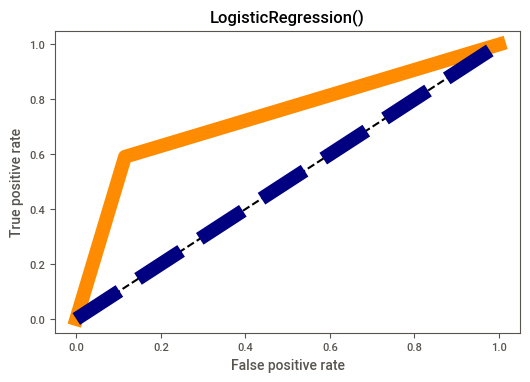

Accuracy score of GaussianNB() : 0.7756716967243282


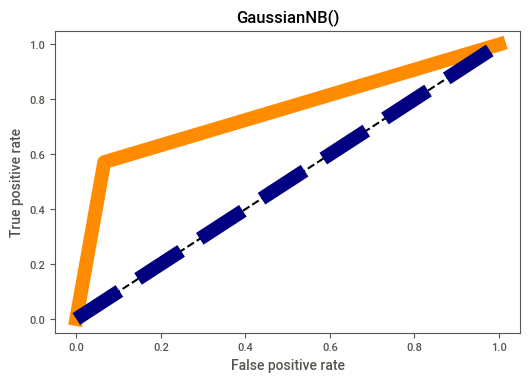

Accuracy score of SVC() : 0.6964482885535518


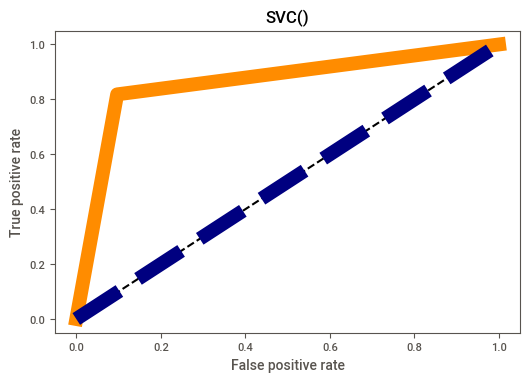

Accuracy score of DecisionTreeClassifier() : 0.7517022451232979


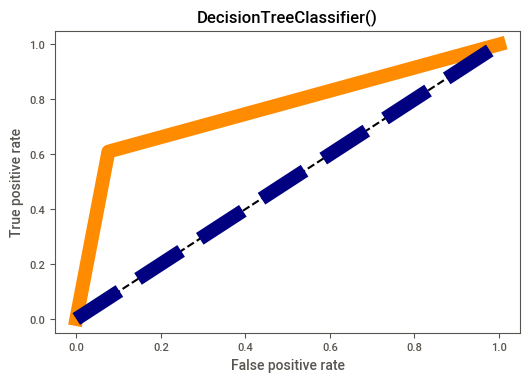

Accuracy score of KNeighborsClassifier() : 0.6769874861980125


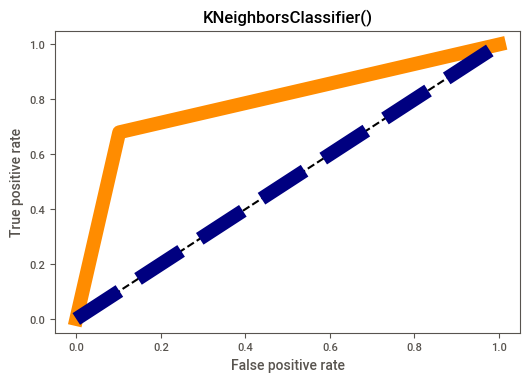

In [36]:
from sklearn.metrics import roc_curve

from sklearn.metrics import roc_auc_score
model=[lg,gnb,svc,dtc,knn]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    
    fpr,tpr,thresholds=roc_curve(predm,y_test)
    auc_score=roc_auc_score(y_test,predm)
    print("Accuracy score of",m,":",auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr,color='darkorange',lw=10)
    plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title(m)
    plt.show()

# Hyper parameter Tuning

In [39]:
param_grid = {'kernel':('linear','rbf','poly'),
              'C':[1,5,10]
} 


In [44]:
grid_search = GridSearchCV(SVC(),
                           param_grid=param_grid)
grid_search.fit(x_train, y_train)
print(grid_search.best_estimator_)
print(grid_search.best_params_)

SVC(C=5)
{'C': 5, 'kernel': 'rbf'}


In [46]:
grid_predictions = grid_search.predict(x_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       247
           1       0.80      0.45      0.58        44

    accuracy                           0.90       291
   macro avg       0.85      0.72      0.76       291
weighted avg       0.89      0.90      0.89       291



In [52]:
svc=SVC(kernel='rbf',C=5)
svc.fit(x_train,y_train)
t=svc.score(x_train,y_train)
print(round(t,2))

0.94


# Save the model

In [56]:
import joblib
filename = 'finalized_model.sav'
joblib.dump(svc, filename)


['finalized_model.sav']

In [57]:
 
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(x_test, y_test)
print(result)

0.9003436426116839
